# **Disease Diagnosis using Symptoms and Patient Data**

### **`Hackathon Challenge Task`**

**Domain**: Healthcare

**Project**: Disease Diagnosis Using Symptoms and Patient Data

**Goal**: Predict common illnesses (e.g., malaria, typhoid) from symptoms.

**ML Angle**: Multiclass classification using patient-reported symptoms

**Real-world add-on**: Integrate confidence intervals for doctor assistance.

# **`Project Workflow`**

1. Introduction (Background, Methodology)

2. Problem Statement

3. Sourcing Data

4. Data Exploration

5. Feature Engineering (Dimensionality Reduction)

6. Data Cleaning

7. Data Visualization

8. Statistical Analysis

9. Data Preprocessing, Model Development & Performance Evaluation

10. Deployment on Streamlit

11. Reference
  

## **`1.1 Background`**
Medical errors can lead to a consequential number of deaths, which can have great repercussions on public health and patient safety. A study reported by Gabriel *et al*. (2024), revealed a high prevalence of medical errors which ranged from 42.8 to 89.8% across various studies in Nigeria. As a case study, in Nigeria, malaria is generally ascribed to all febrile illnesses, and febrile patients regularly exhibit symptoms thought to be caused by malaria or typhoid but which are also commonly observed with other arbovirus infections (Baba *et al*., 2013).

Research papers detail the overlapping symptoms of malaria, dengue, yellow fever, and typhoid fever, particularly in febrile patients, leading to common misdiagnosis. For example, malaria symptoms include fever, chills, and headache, while typhoid fever presents with fever, headache, abdominal pain, and constipation. Dengue fever symptoms can involve fever, headache, and joint pain, sometimes progressing to severe bleeding. Yellow fever also starts with sudden high fever and headache, but may involve nausea and vomiting, and can develop into severe forms with high fatality rates. Because these diseases share similar initial symptoms, especially sudden high fever, headache, and body pains, clinical diagnosis is challenging and requires serological or other specific tests to differentiate between them (Moses *et al*., 2016). 

The misdiagnosis of these highlighted diseases has since become a major concern towards therapeutic administration because of their co-occurrence in many cases and the same location (Okoror *et al*., 2024). Misdiagnosis is a significant problem in the Nigerian and African healthcare system, and the need for dire interventions that proffer solutions to alleviate this challenge is key to drive effective healthcare operations. This challenge drives my team objective to develop a solution that assists doctors in making better-informed diagnostic conclusions, particularly factoring the similarity between the clinical features in this highlighted prevalent diseases in Sub-Saharan Africa. 

In this project, we leverage technology to develop AI-powered solution with a model designed to effectively predict this disease outcomes based on patient clinical symptoms, and potentially reduce medical errors stemming from misdiagnosis.


## **`1.2 Methodology`**
The dataset "**Tabular dataset for AI-based vector-borne disease prediction**" adopted for this project was published on the 30th December, 2024, by research team from Universite Polytechnique de Bobo-Dioulasso, Burkina Faso. The dataset was retrieved from the Mendeley Data repository via the Mendeley API, adhering to established guidelines and protocols to ensure data quality and best practices. This multiclass classification project is carried out by Team C-16, and designed to build an AI-powered solution that assists doctors in disease diagnosis. The data information entail: 

### `Participants`

The dataset gathers clinical information about patients diagnosed with malaria, dengue, yellow fever, and typhoid fever, as well as patients excluded from these diseases. 

### `Data Collection`

The data was collected from the health districts of DO and DAFRA, located in the Hauts-Bassins region of Burkina Faso. The dataset includes 300 records. Among the consultations recorded, 150 are from DAFRA and 150 from DO. The data collection lasted for three months, from September to November 2024.The data collection was carried out using a Kobotoolbox form, provided to the doctors. This form was filled out in real-time during consultations in the DO district and based on archives for the DAFRA district. The form was printed on paper because the doctors found this method faster due to the large number of patients to be consulted. For data from the DAFRA district, recording was done in two steps: first during the initial consultation, and then upon the availability of laboratory results.

### `Procedure for Data Processing and Storage`

The data was preprocessed, and sensitive information such as name, surname, or place of birth was removed. The original form contained 115 questions, but only 109 were retained. The data includes two CSV files: the first, "data.csv," contains the data, and the second, "description.xls," contains the attribute descriptions. Some attributes are present in the description but not in the data, as they were removed due to lack of information.

### `Ethical Approval`

To collect the data, authorization was requested from the Ministry of Health of Burkina Faso.  

### `Acknowledgement`
We duly acknowledge that the dataset was published by Issouf Ouedraogo research team, from the Universite Polytechnique de Bobo-Dioulasso, and we obtained the data from the Mendely data repository, an open source platform for researchers, which is free to share and adapt, following established guidelines as stipulated.

### `Institution`

Universite Polytechnique de Bobo-Dioulasso


## **`2. Problem Statement`**

- Misdiagnosis of malaria, dengue fever and typhoid fever in Sub-Saharan Africa is a primary driver of high mortality

- The lack of robust diagnostic tools and the significant overlap of clinical symptoms among common febrile illnesses, including malaria, dengue, and typhoid fever, create a critical public health challenge in Sub-Saharan Africa. This diagnostic uncertainty leads to a cascade of negative outcomes, demanding the development and implementation of alternative, more precise diagnostic strategies.

## **`3. SOURCING DATA`**

### **`Sourcing Data through API`**

Data was sourced from the Mendely data repository using the Mendeley OAuth token exchange endpoint, `https://api.mendeley.com/oauth/token`. 

The process involved:

1. Signing up on the Mendeley Developer Portal, and creating an Elsevier account to link
2. Registration of application on the portal to generate API credentials (Client ID and Client Secret) used in the client credentials authorization flow
3. Use the Client ID and Client Secret to authenticate your application using the Mendeley API's OAuth 2.0 flow
4. Request an access token from the API token endpoint and extract the access token from the response
5. Use the access token to access the desired dataset.



In [4]:
# Import libraries to request data using API to access research data from Mendeley

import requests                                        # allows to make request to web services, handle responses, send and receive data
import pandas as pd                                    # read file & tabular data manipulation
from io import StringIO                                # provides file-like object access to strings
from io import BytesIO                                 # provides file-like object access to bytes


In [127]:
# Step 1: Creating parameters to obtain credentials to access token
token_url = "https://api.mendeley.com/oauth/token"                     # Mendeley OAuth token exchange endpoint
token_params = {                                                       # creating dictionary to define the authorization parameters
    "grant_type":"client_credentials",                                 # indicates application is requesting access token for itself
    "scope":"all",                                                     # permits the manipulation of all API resources
    "client_id":"20965",                                               # username for HTTP Basic authentication
    "client_secret":"581xdyC5YCDCfYJb"                                 # password for HTTP Basic authentication
}

In [129]:
# Step 2: Deploy authenticated parameters and obtain Access token
# token request made using POST and meeting https request conditions (authenticated parameters)

token_request = requests.post(token_url, headers={"Content-Type": "application/x-www-form-urlencoded"}, data=token_params)  

In [131]:
token_request

<Response [200]>

In [142]:
if token_request.status_code == 200:
    access_token = token_request.json().get("access_token")
    print("Access token obtained successfully.")
else:
    print(f"Error obtaining access token: {token_request.text}")
access_token = token_request.json()["access_token"]


Access token obtained successfully.


In [146]:
# Step 3: Search for ID of dataset of interest using Access token
search_url = "https://api.mendeley.com/datasets"
search_params = {"query": "Tabular dataset for AI-based vector-borne disease prediction"}
search_response = requests.get(search_url, headers={"Authorization": f"Bearer {access_token}"}, params=search_params)
dataset_id = search_response.json()["results"][0]["id"]


In [148]:
dataset_id

'jxj8bn2vyf'

In [150]:
# Step 4: Retrieve the dataset files
files_url = f"https://api.mendeley.com/datasets/{dataset_id}/files"
files_response = requests.get(files_url, headers={"Authorization": f"Bearer {access_token}"})
file_id = files_response.json()[0]["id"]
file_id

'd596dc04-30db-4ba8-a6b5-e135ea34c23b'

In [144]:
# Step 5: Download the dataset file
download_url = f"https://api.mendeley.com/datasets/{dataset_id}/files/{file_id}"
download_response = requests.get(download_url, headers={"Authorization": f"Bearer {access_token}"}, stream=True)
with open("dataset_file", "wb") as file:
    for chunk in download_response.iter_content(chunk_size=8192):
        file.write(chunk)


`dataset_file output`

- {"filename":"Table S1.xlsx","id":"d596dc04-30db-4ba8-a6b5-e135ea34c23b","content_details":{"id":"ec1e7ae1-392c-44f9-8ef1-c54b818d39c6","sha256_hash":"531fd6177df897f77fa85249da2421c3b251169fcb9df6753257ae8d86de90f0","content_type":"application/vnd.openxmlformats-officedocument.spreadsheetml.sheet","size":11231,"created_date":"2022-05-29T18:38:53.119Z","download_url":"https://data.mendeley.com/public-files/datasets/jxj8bn2vyf/files/d596dc04-30db-4ba8-a6b5-e135ea34c23b/file_downloaded","view_url":"https://data.mendeley.com/public-files/datasets/jxj8bn2vyf/files/d596dc04-30db-4ba8-a6b5-e135ea34c23b/file_viewed","download_expiry_time":"2125-08-27T23:16:19.272963784Z"},"size":11231,"status":"COMPLETED"}

In [243]:
# Step 6: Use the access token to authenticate API request

# Specify the dataset URL or ID
dataset_url = "https://data.mendeley.com/datasets/cf49v47z4c/1/files/7a431b5b-65c6-4233-8b56-06d008488aa6"

# Set the access token in the Authorization header
headers = {"Authorization": f"Bearer {access_token}"}

# Send a GET request to download the dataset
response = requests.get(dataset_url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    print("Response request was successfull.")


Response request was successfull.


In [273]:
# Step 7: Create function to download dataset
def read_dataset(dataset_url, access_token=None):
    if dataset_url.startswith("https"):                                                         # Download from online source
        # dataset_url is a URL                                                        
        headers = {"Authorization": f"Bearer {access_token}"} if access_token else {}
        response = requests.get(dataset_url, headers=headers)
        
        if response.status_code == 200:
            if dataset_url.endswith(".csv"):
                df = pd.read_csv(StringIO(response.text))                                       # to retrieve dataset if in csv format
            elif dataset_url.endswith(".json"):
                df = pd.read_json(StringIO(response.text))                                      # to retrieve dataset if in json format
            elif dataset_url.endswith(".xlsx") or dataset_url.endswith(".xls"):
                df = pd.read_excel(BytesIO(response.content))                                   # to retrieve dataset if in xlsx format
            else:
                print("Unsupported file format.")
                df = None
        else:
            print(f"Failed to download dataset. Status code: {response.status_code}")
            df = None
    
        # dataset_url is a string (file path)                                                   
        if dataset_url.endswith(".csv"):
            df = pd.read_csv(dataset_url)                                                       # to retrieve dataset if in csv format
        elif dataset_url.endswith(".json"):
            df = pd.read_json(dataset_url)                                                      # to retrieve dataset if in json format
        elif dataset_url.endswith(".xlsx") or dataset_url.endswith(".xls"):
            df = pd.read_excel(dataset_url)                                                     # to retrieve dataset if in excel format
        else:
            print("Unsupported file format.")
            df = None
    else:
        dataset_file = "/path/to/data.csv"                                                      # Download from local file
        df = read_dataset(dataset_file)

    return df


In [1]:
# Import library
import pandas as pd       # read file & tabular data manipulation


In [2]:
# Read dataset using pandas 
disease_data = pd.read_excel(r"C:\Users\DAMILOLA\Documents\GitHub - Copy\WebScraping-projects\data.xlsx")
if disease_data is not None:                                            
    print("Dataset read successfully for Hackathon task")
    

Dataset read successfully for Hackathon task


In [3]:
# View data in Pandas DataFrame
disease_data

,Centre de santé,Genre (Gender),Âge (Age),Poids (Weight),Circonference du bras (Mua circumference),Haute température.(temperature,Fièvre depuis 48 heures(Fever 48 hrs),Fièvre au cours des 7 derniers jours (Fever in the last 7 days),Type de fièvre (Type of Fever),Perte de poids (Loss of Weight),...,Maladies diagnostiquées/Paludisme (Malaria),Maladies diagnostiquées/Dengue,Maladies diagnostiquées/Chikunguya,Maladies diagnostiquées/Fièvre jaune (yellow fever),Maladies diagnostiquées/Fièvre Typhoïde (Thyphoid fever),Maladies diagnostiquées/Zika,Maladies diagnostiquées/Autres maladies diagnostiqué (Others diseases),Maladies diagnostiquées/Option 8,Autres maladies présentées par le patient,_uuid
0,CMA de DO,Femme,18,55.0,NaN,OUI,OUI,OUI,Récurrente,NON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CMA de DO,Homme,26,120.0,NaN,OUI,OUI,OUI,Récurrente,NON,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4a7ef2f3-4ff0-4215-8cb5-20ba8c8d4355
2,CMA de DO,Homme,25,63.0,NaN,OUI,OUI,OUI,Récurrente,NON,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,104f6bc8-f39a-482b-b680-7ac1f8cccc86
3,CMA de DO,Homme,3,12.0,13.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CMA de DO,Homme,8,24.0,NaN,OUI,OUI,NON,Récurrente,NON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,CMA de DAFRA,Femme,9,21.0,NaN,OUI,OUI,NON,Intermittente,NON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,CMA de DAFRA,Femme,6,19.0,NaN,OUI,OUI,NON,Intermittente,NON,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,7e41d7b6-b8a6-44d7-8a7a-93debef7b1dd
297,CMA de DAFRA,Femme,9,NaN,NaN,OUI,OUI,NON,Intermittente,NON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,CMA de DAFRA,Homme,7,16.0,NaN,OUI,OUI,NON,Intermittente,NON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Read description dataset using Pandas 
attribute_descr_data = pd.read_excel(r"C:\Users\DAMILOLA\Documents\GitHub - Copy\WebScraping-projects\desciption.xlsx")
if attribute_descr_data is not None:                                            
    print("Dataset containing data attribute description read successfully for Hackathon task")
    

Dataset containing data attribute description read successfully for Hackathon task


In [5]:
# View attribute description of dataset
attribute_descr_data

,attributs (FR),attributes (EN),Category,Description
0,Âge,Age,Demographic Variable,The age of the person in years.
1,Hauteur,Height,Demographic Variable,The height of the person in centimeters.
2,Poids,Weight,Demographic Variable,The weight of the person in kilograms.
3,Circonférence de Mua,Mua circumference,Demographic Variable,Measurement of the circumference of a specific...
4,Tour de taille,Waist circumference,Demographic Variable,Measurement of the waist circumference in cent...
...,...,...,...,...
59,C-Reactive Protein (CRP),C-Reactive Protein (CRP) Levels,Laboratory Variable,Protein produced by the liver in response to i...
60,Résultats du scanner (CT Scan),CT Scan Results,Laboratory Variable,CT scan results used to diagnose various condi...
61,Résultats RT-PCR,RT-PCR Results,Laboratory Variable,"RT-PCR test results, commonly used to detect v..."
62,Résultat de la radiographie,X-ray Result,Laboratory Variable,X-ray results used to visualize internal struc...


#### **`Data Sourcing Summary`**

 The data includes two CSV files: the first, "data.csv," contains the diseases and symptoms;

while  the second, "desription.xls," contains the attribute descriptions..

## **`4. DATA EXPLORATION`**

#### **`Objective`**

In this stage, the raw data will be assessed 

### **`Data Overview`**

In [10]:
# View shape of DataFrame
print("The data has", disease_data.shape, "rows and columns respectively")

The data has (300, 109) rows and columns respectively


In [11]:
print("Information about the data:-")
disease_data.info()

Information about the data:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Columns: 109 entries, Centre de santé to _uuid
dtypes: float64(18), object(91)
memory usage: 255.6+ KB


In [12]:
print("Statistical information of quantitative variable in dataset:-")
disease_data.describe().T

Statistical information of quantitative variable in dataset:-


,count,mean,std,min,25%,50%,75%,max
Poids (Weight),196.0,32.571429,27.370207,2.00,11.0000,18.000,54.25,131.0
Circonference du bras (Mua circumference),25.0,89.322000,64.193510,13.00,13.0000,127.000,141.00,160.0
Fréquence respiratoire (médiane IQR) / Respiratory rate (median breaths/min IQR),193.0,33.779793,9.953949,6.00,28.0000,32.000,38.00,66.0
Temps de remplissage capillaire (médiane secs IQR). / Capillary refill time (median secs IQR),75.0,7.480000,44.291223,2.00,2.0000,2.000,2.00,385.0
Hematocrite (Hematrocrit),172.0,2815.275872,7998.712540,0.00,5.1450,19.150,34.05,35400.0
Lymphocytes,122.0,2960.666557,3886.252591,1.61,675.0000,1995.000,4017.50,33640.0
Nombre de globules blancs (cellules/ML) / White blood cell count / WBC count (cells/ML),215.0,6329.970140,8885.018981,1.01,12.2750,875.000,10715.00,58480.0
Numération plaquettaire Platelet count,204.0,75561.761029,122086.770059,11.25,199.5000,377.000,125750.00,801000.0
Neutrophiles / Neutrophils,180.0,5362.568833,26046.673842,0.00,2.9175,15.465,6372.50,345000.0
Créatinine élevée / Elevated Creatinine,175.0,112.366857,115.830338,4.00,64.0000,91.000,110.00,924.0


In [13]:
print("List of columns in the dataset:-")
disease_data.columns

List of columns in the dataset:-


Index(['Centre de santé', 'Genre (Gender)', 'Âge (Age)', 'Poids (Weight)',
       'Circonference du bras (Mua circumference)',
       'Haute température.(temperature',
       'Fièvre depuis 48 heures(Fever 48 hrs)',
       'Fièvre au cours des 7 derniers jours (Fever in the last 7 days)',
       'Type de fièvre (Type of Fever)', 'Perte de poids (Loss of Weight)',
       ...
       'Maladies diagnostiquées/Paludisme (Malaria)',
       'Maladies diagnostiquées/Dengue', 'Maladies diagnostiquées/Chikunguya',
       'Maladies diagnostiquées/Fièvre jaune (yellow fever)',
       'Maladies diagnostiquées/Fièvre Typhoïde (Thyphoid fever)',
       'Maladies diagnostiquées/Zika',
       'Maladies diagnostiquées/Autres maladies diagnostiqué (Others diseases)',
       'Maladies diagnostiquées/Option 8',
       'Autres maladies présentées par le patient', '_uuid'],
      dtype='object', length=109)

In [14]:
# Define function to return all column names as list
def get_column_names(df):
    """
    Returns a list of all column names in a DataFrame.
    """
    return df.columns.tolist()


In [15]:
# Overview of all column names in the dataset
column_names = get_column_names(disease_data)
print(column_names)

['Centre de santé', 'Genre (Gender)', 'Âge (Age)', 'Poids (Weight)', 'Circonference du bras (Mua circumference)', 'Haute température.(temperature', 'Fièvre depuis 48 heures(Fever 48 hrs)', 'Fièvre au cours des 7 derniers jours (Fever in the last 7 days)', 'Type de fièvre (Type of Fever)', 'Perte de poids (Loss of Weight)', 'Maux de tête (headache)', 'Nausée (Nausea)', 'Vomissement (Vomiting)', 'Douleur articulaire (Joint pain)', 'Gonflement des articulations (Joint Swelling)', 'Douleur musculaire ( Muscle pain)', 'Douleur Thoracique (Chaist pain)', 'Mal de dos / Douleur rachidienne ( Back pain / Rachiodynia)', 'Troubles de la conscience (Consciousness trouble)', "Perte d'appétit ou Anorexie (Loss of appetite or Anorexia)", 'Éruptions cutanées ou Exanthème (Skin rash or Exanthema)', 'Éruption morbilliforme (Morbilliform rash)', 'Saignement/ Manifestations hémorragiques (Bleeding)', 'Rhinorrhée (Rhinorrhea)', 'Somnolence ou léthargie (Drowsiness or lethargy)', 'Vertige (Dizzy)', 'Inflamm

#### **`Data Exploration summary`**
1. The raw data is multilingual (French & English)
2. Lengthy column list with 109 entries
3. For more information on the data attribute, review the attribute description dataset

## **`5. FEATURE ENGINEERING (DIMENSIONALITY REDUCTION)`**

#### **`Objective`**

In this stage, raw data is transformed into a more relevant set of input features that enable machine learning models to learn from, and make precise predictions that support doctors in their clinical diagnosis based on observed patient symptoms


In [19]:
# Subset original DataFrame using Indexing to extract relevant data
new_disease_data = disease_data.iloc[:, :56].assign(disease=disease_data['Maladies diagnostiquées']).copy()    # slicing to create new dataframe 
new_disease_data                                                                                               # View subsetted DataFrame


,Centre de santé,Genre (Gender),Âge (Age),Poids (Weight),Circonference du bras (Mua circumference),Haute température.(temperature,Fièvre depuis 48 heures(Fever 48 hrs),Fièvre au cours des 7 derniers jours (Fever in the last 7 days),Type de fièvre (Type of Fever),Perte de poids (Loss of Weight),...,Gonflement du visage (Facial Swelling),Sudation excessive (Profuse sweating),Délire /Discours irrationnel (Delirium/ Irrational Talking),Hémoglobinurie (Hemoglobinuria),Goût amer dans la gorge (Bitter taste in your Throat),Test de garrot positif (Positive tourniquet test),Raideur (Stiffness),Détresse respiratoire (Respiratory distress),Choc septique (Shock),disease
0,CMA de DO,Femme,18,55.0,NaN,OUI,OUI,OUI,Récurrente,NON,...,NON,NON,NON,NON,NON,NON,NON,NON,NON,NaN
1,CMA de DO,Homme,26,120.0,NaN,OUI,OUI,OUI,Récurrente,NON,...,NON,NON,NON,NON,NON,NON,NON,NON,NON,Paludisme (Malaria) Dengue
2,CMA de DO,Homme,25,63.0,NaN,OUI,OUI,OUI,Récurrente,NON,...,NON,NON,NON,NON,NON,NON,NON,OUI,NON,Paludisme (Malaria) Fièvre Typhoïde (Thyphoid ...
3,CMA de DO,Homme,3,12.0,13.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CMA de DO,Homme,8,24.0,NaN,OUI,OUI,NON,Récurrente,NON,...,NON,NON,NON,NON,NON,NON,NON,NON,NON,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,CMA de DAFRA,Femme,9,21.0,NaN,OUI,OUI,NON,Intermittente,NON,...,NON,NON,NON,NON,NON,OUI,NON,NON,NON,NaN
296,CMA de DAFRA,Femme,6,19.0,NaN,OUI,OUI,NON,Intermittente,NON,...,NON,NON,NON,NON,NON,OUI,NON,NON,NON,Paludisme (Malaria)
297,CMA de DAFRA,Femme,9,NaN,NaN,OUI,OUI,NON,Intermittente,NON,...,NON,NON,NON,NON,NON,OUI,NON,NON,NON,NaN
298,CMA de DAFRA,Homme,7,16.0,NaN,OUI,OUI,NON,Intermittente,NON,...,NON,NON,NON,NON,NON,OUI,NON,NON,NON,NaN


#### **`Feature Engineering summary`**
57 columns out of 109 were selected, and adopted to provide data that better represent the objective this project is designed for

## **`6. DATA CLEANING`**

#### **`Objective`**
In this stage, the data cleaning entail:
1. Modifying column and entry names from French to English
2. Deleting irrelevant data
3. Check for duplicates
4. Identifying and addressing missing values 
   

#### **`Step 1: Modifying column names and entries`**

In [24]:
# Rename columns
new_disease_data_column = new_disease_data.rename(columns={
    'Centre de santé': 'health_centre',
    'Genre (Gender)': 'gender',
    'Âge (Age)': 'age',
    'Poids (Weight)': 'weight',
    'Haute température.(temperature': 'high_temperature',
    'Fièvre depuis 48 heures(Fever 48 hrs)': 'fever_48hrs',
    'Fièvre au cours des 7 derniers jours (Fever in the last 7 days)': 'fever_in_the_last_7days',
    'Type de fièvre (Type of Fever)': 'type_of_fever',
    'Perte de poids (Loss of Weight)': 'loss_of_weight',
    'Maux de tête (headache)': 'headache',
    'Nausée (Nausea)': 'nausea',
    'Vomissement (Vomiting)': 'vomiting',
    'Douleur articulaire (Joint pain)': 'joint_pain',
    'Gonflement des articulations (Joint Swelling)': 'joint_swelling',
    'Douleur musculaire ( Muscle pain)': 'muscle_pain',
    'Douleur Thoracique (Chaist pain)': 'chest_pain',
    'Mal de dos / Douleur rachidienne ( Back pain / Rachiodynia)': 'back_pain',
    'Troubles de la conscience (Consciousness trouble)': 'loss_of_consciousness',
    "Perte d'appétit ou Anorexie (Loss of appetite or Anorexia)": 'loss_of_appetite',
    'Éruptions cutanées ou Exanthème (Skin rash or Exanthema)': 'skin_rash',
    'Éruption morbilliforme (Morbilliform rash)': 'morbilliform_rash',
    'Saignement/ Manifestations hémorragiques (Bleeding)': 'bleeding',
    'Rhinorrhée (Rhinorrhea)': 'runny_nose',
    'Somnolence ou léthargie (Drowsiness or lethargy)': 'lethargy',
    'Vertige (Dizzy)': 'dizzy',
    'Douleur abdominale (stomac pain)': 'stomach_pain',
    'Distension abdominale (Ventre gonflé) (Abdominal Distension (Swelling Stomach)/ Ascites)': 'swelling_stomach',
    'Mal de gorge (throat pain)': 'throat_pain',
    'Toux (Cough)': 'cough',
    'Diarrhée (Diarrhea)': 'diarrhoea',
    'Douleur rétro-orbitrale (Retro-orbital pain)': 'retro_orbital_pain',
    'Sensation de frissons ou de froid (Shiver or cold sensation)': 'shiver_cold_sensation',
    'Mictions fréquentes.(Frequent Urination)': 'frequent_urination',
    'Epistaxis ((Bleeding nose)': 'bleeding_nose',
    'Convulsions généralisées ou focales (Generalised or focal convulsion)': 'focal_convulsion',
    'Convulsions multiples (Multiple convulsions)': 'multiple_convulsions',
    'Confusion/ niveau de conscience altéré (impaired level of consciousness)': 'impaired_level_of_consciousness',
    'Rougeur faciale (Facial flushing)': 'facial_flushing',
    'Gonflement du visage (Facial Swelling)': 'facial_swelling',
    'Sudation excessive (Profuse sweating)': 'profuse_sweating',
    'Délire /Discours irrationnel (Delirium/ Irrational Talking)': 'irrational_talking',
    'Goût amer dans la gorge (Bitter taste in your Throat)': 'bitter_taste_in_your_throat',
    'Raideur (Stiffness)': 'stiffness',
    'Détresse respiratoire (Respiratory distress)': 'respiratory_distress',
    'Choc septique (Shock)': 'shock'
})

new_disease_data_column                # View DataFrame with modified column names


,health_centre,gender,age,weight,Circonference du bras (Mua circumference),high_temperature,fever_48hrs,fever_in_the_last_7days,type_of_fever,loss_of_weight,...,facial_swelling,profuse_sweating,irrational_talking,Hémoglobinurie (Hemoglobinuria),bitter_taste_in_your_throat,Test de garrot positif (Positive tourniquet test),stiffness,respiratory_distress,shock,disease
0,CMA de DO,Femme,18,55.0,NaN,OUI,OUI,OUI,Récurrente,NON,...,NON,NON,NON,NON,NON,NON,NON,NON,NON,NaN
1,CMA de DO,Homme,26,120.0,NaN,OUI,OUI,OUI,Récurrente,NON,...,NON,NON,NON,NON,NON,NON,NON,NON,NON,Paludisme (Malaria) Dengue
2,CMA de DO,Homme,25,63.0,NaN,OUI,OUI,OUI,Récurrente,NON,...,NON,NON,NON,NON,NON,NON,NON,OUI,NON,Paludisme (Malaria) Fièvre Typhoïde (Thyphoid ...
3,CMA de DO,Homme,3,12.0,13.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CMA de DO,Homme,8,24.0,NaN,OUI,OUI,NON,Récurrente,NON,...,NON,NON,NON,NON,NON,NON,NON,NON,NON,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,CMA de DAFRA,Femme,9,21.0,NaN,OUI,OUI,NON,Intermittente,NON,...,NON,NON,NON,NON,NON,OUI,NON,NON,NON,NaN
296,CMA de DAFRA,Femme,6,19.0,NaN,OUI,OUI,NON,Intermittente,NON,...,NON,NON,NON,NON,NON,OUI,NON,NON,NON,Paludisme (Malaria)
297,CMA de DAFRA,Femme,9,NaN,NaN,OUI,OUI,NON,Intermittente,NON,...,NON,NON,NON,NON,NON,OUI,NON,NON,NON,NaN
298,CMA de DAFRA,Homme,7,16.0,NaN,OUI,OUI,NON,Intermittente,NON,...,NON,NON,NON,NON,NON,OUI,NON,NON,NON,NaN


In [25]:
disease_df_original = new_disease_data_column['disease'].copy()            # store original copy of diagnosed disease column
new_disease_data_column['disease'].unique()                                # view unique entries in diagnosed disease column

array([nan, 'Paludisme (Malaria) Dengue',
       'Paludisme (Malaria) Fièvre Typhoïde (Thyphoid fever)',
       'Paludisme (Malaria)',
       'Paludisme (Malaria) Autres maladies diagnostiqué (Others diseases)',
       'Paludisme (Malaria) Fièvre jaune (yellow fever)',
       'Dengue Fièvre jaune (yellow fever)', 'Dengue',
       'Dengue Autres maladies diagnostiqué (Others diseases)',
       'Paludisme (Malaria) Dengue Autres maladies diagnostiqué (Others diseases)',
       'Paludisme (Malaria) Fièvre jaune (yellow fever) Autres maladies diagnostiqué (Others diseases)',
       'Paludisme (Malaria) Fièvre Typhoïde (Thyphoid fever) Autres maladies diagnostiqué (Others diseases)',
       'Dengue Fièvre Typhoïde (Thyphoid fever)',
       'Autres maladies diagnostiqué (Others diseases)',
       'Paludisme (Malaria) Dengue Fièvre Typhoïde (Thyphoid fever)',
       'Fièvre jaune (yellow fever) Fièvre Typhoïde (Thyphoid fever)'],
      dtype=object)

In [26]:
# Modify disease column entries name using map

new_disease_data_column['disease'] = new_disease_data_column['disease'].map({
    'Paludisme (Malaria) Dengue': 'malaria_dengue',
    'Paludisme (Malaria) Fièvre Typhoïde (Thyphoid fever)': 'malaria_typhoid_fever',
    'Paludisme (Malaria)': 'malaria',
    'Paludisme (Malaria) Autres maladies diagnostiqué (Others diseases)': 'malaria_other_diseases',
    'Paludisme (Malaria) Fièvre jaune (yellow fever)': 'malaria_yellow_fever',
    'Dengue Fièvre jaune (yellow fever)': 'dengue_yellow_fever',
    'Dengue Autres maladies diagnostiqué (Others diseases)': 'dengue_other_diseases',
    'Paludisme (Malaria) Dengue Autres maladies diagnostiqué (Others diseases)': 'malaria_dengue_other_diseases',
    'Paludisme (Malaria) Fièvre jaune (yellow fever) Autres maladies diagnostiqué (Others diseases)': 'malaria_yellow_fever_other_diseases',
    'Paludisme (Malaria) Fièvre Typhoïde (Thyphoid fever) Autres maladies diagnostiqué (Others diseases)': 'malaria_typhoid_fever_other_diseases',
    'Dengue Fièvre Typhoïde (Thyphoid fever)': 'dengue_typhoid_fever',
    'Autres maladies diagnostiqué (Others diseases)': 'other_diseases',
    'Paludisme (Malaria) Dengue Fièvre Typhoïde (Thyphoid fever)': 'malaria_dengue_typhoid_fever',
    'Fièvre jaune (yellow fever) Fièvre Typhoïde (Thyphoid fever)': 'yellow_fever_thyphoid_fever'
})

new_disease_data_column['disease']               # view modified disease column in English

0                        NaN
1             malaria_dengue
2      malaria_typhoid_fever
3                        NaN
4                        NaN
               ...          
295                      NaN
296                  malaria
297                      NaN
298                      NaN
299                      NaN
Name: disease, Length: 300, dtype: object

In [27]:
# Rename specific column entries across all columns
disease_df = new_disease_data_column.applymap(lambda x: 'male' if x == 'Homme' else
                             'female' if x == 'Femme' else
                             'yes' if x == 'OUI' else
                             'no' if x == 'NON' else
                             'intermittent' if x == 'Intermittente' else
                             'recurrent' if x == 'Récurrente' else x)

disease_df       # View DataFrame


C:\Users\DAMILOLA\AppData\Local\Temp\ipykernel_20876\207766246.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  disease_df = new_disease_data_column.applymap(lambda x: 'male' if x == 'Homme' else


,health_centre,gender,age,weight,Circonference du bras (Mua circumference),high_temperature,fever_48hrs,fever_in_the_last_7days,type_of_fever,loss_of_weight,...,facial_swelling,profuse_sweating,irrational_talking,Hémoglobinurie (Hemoglobinuria),bitter_taste_in_your_throat,Test de garrot positif (Positive tourniquet test),stiffness,respiratory_distress,shock,disease
0,CMA de DO,female,18,55.0,NaN,yes,yes,yes,Récurrente,no,...,no,no,no,no,no,no,no,no,no,NaN
1,CMA de DO,male,26,120.0,NaN,yes,yes,yes,Récurrente,no,...,no,no,no,no,no,no,no,no,no,malaria_dengue
2,CMA de DO,male,25,63.0,NaN,yes,yes,yes,Récurrente,no,...,no,no,no,no,no,no,no,yes,no,malaria_typhoid_fever
3,CMA de DO,male,3,12.0,13.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CMA de DO,male,8,24.0,NaN,yes,yes,no,Récurrente,no,...,no,no,no,no,no,no,no,no,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,CMA de DAFRA,female,9,21.0,NaN,yes,yes,no,Intermittente,no,...,no,no,no,no,no,yes,no,no,no,NaN
296,CMA de DAFRA,female,6,19.0,NaN,yes,yes,no,Intermittente,no,...,no,no,no,no,no,yes,no,no,no,malaria
297,CMA de DAFRA,female,9,NaN,NaN,yes,yes,no,Intermittente,no,...,no,no,no,no,no,yes,no,no,no,NaN
298,CMA de DAFRA,male,7,16.0,NaN,yes,yes,no,Intermittente,no,...,no,no,no,no,no,yes,no,no,no,NaN


#### **`Step 2: Deleting irrelevant data`**

In [29]:
# Define the list of columns to delete
columns_to_delete = ['Circonference du bras (Mua circumference)','Oligurie (Oliguria)','Prostration', 'Ictère (Icterus)','Délire','Hémoglobinurie (Hemoglobinuria)','Inflammation de conjonctivite','Céphalée (Headache)', 'Mictions fréquentes. (Frequent Urination)','Test de garrot positif (Positive tourniquet test)']

# Drop the columns
disease_df = disease_df.drop(columns=columns_to_delete, axis=1)

# View DataFrame
disease_df


,health_centre,gender,age,weight,high_temperature,fever_48hrs,fever_in_the_last_7days,type_of_fever,loss_of_weight,headache,...,impaired_level_of_consciousness,facial_flushing,facial_swelling,profuse_sweating,irrational_talking,bitter_taste_in_your_throat,stiffness,respiratory_distress,shock,disease
0,CMA de DO,female,18,55.0,yes,yes,yes,Récurrente,no,yes,...,no,no,no,no,no,no,no,no,no,NaN
1,CMA de DO,male,26,120.0,yes,yes,yes,Récurrente,no,yes,...,no,no,no,no,no,no,no,no,no,malaria_dengue
2,CMA de DO,male,25,63.0,yes,yes,yes,Récurrente,no,yes,...,no,no,no,no,no,no,no,yes,no,malaria_typhoid_fever
3,CMA de DO,male,3,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CMA de DO,male,8,24.0,yes,yes,no,Récurrente,no,yes,...,no,no,no,no,no,no,no,no,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,CMA de DAFRA,female,9,21.0,yes,yes,no,Intermittente,no,yes,...,no,no,no,no,no,no,no,no,no,NaN
296,CMA de DAFRA,female,6,19.0,yes,yes,no,Intermittente,no,yes,...,no,no,no,no,no,no,no,no,no,malaria
297,CMA de DAFRA,female,9,NaN,yes,yes,no,Intermittente,no,yes,...,no,no,no,no,no,no,no,no,no,NaN
298,CMA de DAFRA,male,7,16.0,yes,yes,no,Intermittente,no,yes,...,no,no,no,no,no,no,no,no,no,NaN


##### **`Data cleaning comment`**
10 columns were deleted from dataset

#### **`Step 3: Check for duplicates`**

In [32]:
print("Total number of duplicates in dataset:- ")
disease_df[disease_df.duplicated()].sum().sum()


Total number of duplicates in dataset:- 


0.0

#### **`Step 4: Identifying and addressing missing values`**

In [34]:
# Check for missing values
print("Total number of missing values in dataset:-")
disease_df.isnull().sum().sum()


Total number of missing values in dataset:-


398

In [35]:
# Determine the number of rows in dataset with missing values
rows_with_missing_values = disease_df.isnull().any(axis=1).sum()

print(f"The number of rows with missing values is {rows_with_missing_values}, out of 300 rows in the dataset")

The number of rows with missing values is 146, out of 300 rows in the dataset


In [36]:
# Determine the number of missing values per column
print("No. of missing values per column:-")
      
disease_df.isnull().sum()

No. of missing values per column:-


health_centre                        0
gender                               2
age                                  0
weight                             104
high_temperature                     5
fever_48hrs                          7
fever_in_the_last_7days              8
type_of_fever                       10
loss_of_weight                       6
headache                             6
nausea                               7
vomiting                             5
joint_pain                           5
joint_swelling                       6
muscle_pain                          6
chest_pain                           5
back_pain                            6
loss_of_consciousness                5
loss_of_appetite                     5
skin_rash                            5
morbilliform_rash                    5
bleeding                             5
runny_nose                           5
lethargy                             5
dizzy                                5
stomach_pain             

In [37]:
# To determine the number of missing patient diagnostic outcome value from CMA de D0(Health Centre) 
specific_entry = 'CMA de DO'
column_name = 'health_centre'
target_column = 'disease'

# Determine the number of missing values relative to the specific Health Centre
DO_missing_values = disease_df.loc[disease_df[column_name] == specific_entry, target_column].isnull().sum()

print(f"{DO_missing_values} patient result (disease diagnostic outcome) were missing from CMA de DO Health centre")

32 patient result (disease diagnostic outcome) were missing from CMA de DO Health centre


In [38]:
# To determine the number of missing patient diagnostic outcome value from CMA de DAFRA(Health Centre)
specific_entry = 'CMA de DAFRA'
column_name = 'health_centre'
target_column = 'disease'

# Determine the number of missing values relative to the specific Health Centre
DAFRA_missing_values = disease_df.loc[disease_df[column_name] == specific_entry, target_column].isnull().sum()

print(f"{DAFRA_missing_values} patient result (disease diagnostic outcome) were missing from CMA de DAFRA Health centre")

24 patient result (disease diagnostic outcome) were missing from CMA de DAFRA Health centre


##### **`Data cleaning comment`**
In the data collection documentation, it was reported in CMA de DO district health centre, the form was filled out in real-time during consultations with doctors. The form was printed on paper because the doctors found this method faster due to the large number of patients to be consulted.

However, for data from the DAFRA district, recording was done in two steps: first during the initial consultation, and then upon the availability of laboratory results, which appears a bit more organized

**`Inference`**

1. The higher count of missing values at the DO health centre (32) compared to the DAFRA health centre (24) may be attributed to the large patient volume and the use of paper-based documentation, which can increase the likelihood of errors and data loss.

2. The original form contained 115 questions, but only 109 were retained. This indicates that some data are missing by design, and there's no specific reason or pattern. Hence, mechanism of missingness is Missing Completely at Random (MCAR)

3. Out of 57 columns, only 2 columns had missing values higher than 5% of total data column

In [40]:
print("Total number of missing values in diagnosed disease column:-")
disease_df['disease'].isnull().sum()


Total number of missing values in diagnosed disease column:-


56

In [41]:
# Create new DataFrame where 'disease' column entry is not null
disease_df_subset = disease_df[disease_df['disease'].notna()]
disease_df_subset


,health_centre,gender,age,weight,high_temperature,fever_48hrs,fever_in_the_last_7days,type_of_fever,loss_of_weight,headache,...,impaired_level_of_consciousness,facial_flushing,facial_swelling,profuse_sweating,irrational_talking,bitter_taste_in_your_throat,stiffness,respiratory_distress,shock,disease
1,CMA de DO,male,26,120.0,yes,yes,yes,Récurrente,no,yes,...,no,no,no,no,no,no,no,no,no,malaria_dengue
2,CMA de DO,male,25,63.0,yes,yes,yes,Récurrente,no,yes,...,no,no,no,no,no,no,no,yes,no,malaria_typhoid_fever
5,CMA de DO,male,6,NaN,yes,yes,no,Récurrente,yes,yes,...,no,no,no,no,no,no,no,no,no,malaria
6,CMA de DO,male,2,NaN,no,no,yes,Récurrente,yes,no,...,no,no,no,no,no,no,no,no,no,malaria
7,CMA de DO,female,2.8,NaN,yes,yes,yes,Récurrente,no,no,...,no,no,no,no,no,no,no,no,no,malaria_other_diseases
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,CMA de DAFRA,male,4.5,15.0,yes,yes,no,Intermittente,no,yes,...,no,no,no,no,no,no,yes,no,no,malaria
290,CMA de DAFRA,female,7,25.0,yes,yes,no,Intermittente,no,yes,...,no,no,NaN,no,no,no,no,no,no,yellow_fever_thyphoid_fever
292,CMA de DAFRA,male,6,16.0,yes,yes,no,Intermittente,no,yes,...,no,no,no,no,no,no,yes,no,no,malaria
293,CMA de DAFRA,female,2.1,10.0,yes,yes,no,Intermittente,no,yes,...,no,no,no,no,no,no,no,no,no,malaria_dengue


In [42]:
# Identify number of missing values in new DataFrame
disease_df_subset.isnull().sum()

health_centre                       0
gender                              1
age                                 0
weight                             84
high_temperature                    0
fever_48hrs                         1
fever_in_the_last_7days             3
type_of_fever                       4
loss_of_weight                      1
headache                            0
nausea                              2
vomiting                            0
joint_pain                          0
joint_swelling                      0
muscle_pain                         0
chest_pain                          0
back_pain                           1
loss_of_consciousness               0
loss_of_appetite                    0
skin_rash                           0
morbilliform_rash                   0
bleeding                            0
runny_nose                          0
lethargy                            0
dizzy                               0
stomach_pain                        0
swelling_sto

##### **`Data cleaning comment`**
1. Weight column has the highest number of missing values after subsetting the DataFrame using 

2. Deletion of 84 rows will lead to loss of valuable data. Also, mean/median/mode or regression imputation strategy do not constitute best approach in filling the missing values

3. To address this, K-Nearest Neighbour (KNN) technique will be adopted to preserve data integrity 
   

In [44]:
# View weight column entries
disease_df['weight'].unique()

array([ 55., 120.,  63.,  12.,  24.,  nan,  68.,  75.,  15.,  16.,  58.,
        61.,  17.,  52.,   6.,  11., 131.,  70.,  69.,  56.,  71.,  78.,
        82.,  54.,  10.,  53.,  14.,  80.,  81.,  42.,  85.,  51.,  27.,
        89.,  13.,  35.,   8., 125.,  65.,  87.,  44.,  28.,  26.,  31.,
        18.,  20.,  73.,  64.,  62.,  49.,   7.,   9.,  25.,   2.,  22.,
        21.,  72.,  60.,  46.,  38.,  45.,  76.,  48.,  39.,   5.,  43.,
        66.,  50.,  59.,  23.,  19.])

In [45]:
# View all columns as a list for One-hot encoding of Categorical variables
print(list(disease_df.columns))


['health_centre', 'gender', 'age', 'weight', 'high_temperature', 'fever_48hrs', 'fever_in_the_last_7days', 'type_of_fever', 'loss_of_weight', 'headache', 'nausea', 'vomiting', 'joint_pain', 'joint_swelling', 'muscle_pain', 'chest_pain', 'back_pain', 'loss_of_consciousness', 'loss_of_appetite', 'skin_rash', 'morbilliform_rash', 'bleeding', 'runny_nose', 'lethargy', 'dizzy', 'stomach_pain', 'swelling_stomach', 'throat_pain', 'cough', 'diarrhoea', 'retro_orbital_pain', 'shiver_cold_sensation', 'frequent_urination', 'Constipation', 'bleeding_nose', 'focal_convulsion', 'multiple_convulsions', 'impaired_level_of_consciousness', 'facial_flushing', 'facial_swelling', 'profuse_sweating', 'irrational_talking', 'bitter_taste_in_your_throat', 'stiffness', 'respiratory_distress', 'shock', 'disease']


In [46]:
# Import python libraries 
from sklearn.preprocessing import OneHotEncoder             # encoding categorical variable
from sklearn.impute import KNNImputer                       # imputation strategy for missing values
import numpy as np                                          # numerical computing


In [47]:
# One-hot encode categorical feature
disease_df_subset_dummy = pd.get_dummies(disease_df_subset, columns=['health_centre', 'gender', 'age','high_temperature', 'fever_48hrs', 'fever_in_the_last_7days', 'type_of_fever', 'loss_of_weight', 'headache', 'nausea', 'vomiting', 'joint_pain', 'joint_swelling', 'muscle_pain', 'chest_pain', 'back_pain', 'loss_of_consciousness', 'loss_of_appetite', 'skin_rash', 'morbilliform_rash', 'bleeding', 'runny_nose', 'lethargy', 'dizzy', 'stomach_pain', 'swelling_stomach', 'throat_pain', 'cough', 'diarrhoea', 'retro_orbital_pain', 'shiver_cold_sensation', 'frequent_urination', 'Constipation', 'bleeding_nose', 'focal_convulsion', 'multiple_convulsions', 'impaired_level_of_consciousness', 'facial_flushing', 'facial_swelling', 'profuse_sweating', 'irrational_talking', 'bitter_taste_in_your_throat', 'stiffness', 'respiratory_distress', 'shock', 'disease'])
disease_df_subset_dummy                  # View One-hot encoded Categorical variable of DataFrame (dummy)


,weight,health_centre_CMA de DAFRA,health_centre_CMA de DO,gender_female,gender_male,age_0.1,age_0.11,age_0.7,age_0.9,age_1.0,...,disease_malaria_dengue,disease_malaria_dengue_other_diseases,disease_malaria_dengue_typhoid_fever,disease_malaria_other_diseases,disease_malaria_typhoid_fever,disease_malaria_typhoid_fever_other_diseases,disease_malaria_yellow_fever,disease_malaria_yellow_fever_other_diseases,disease_other_diseases,disease_yellow_fever_thyphoid_fever
1,120.0,False,True,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,63.0,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5,NaN,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,NaN,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,NaN,False,True,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,15.0,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
290,25.0,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
292,16.0,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
293,10.0,True,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [48]:
# Overview of all One-hot encoded features in the dataset
dummy_column_names = get_column_names(disease_df_subset_dummy)         # call function (get_column_names) to extract encoded features column name as list
print(dummy_column_names)

['weight', 'health_centre_CMA de DAFRA', 'health_centre_CMA de DO', 'gender_female', 'gender_male', 'age_0.1', 'age_0.11', 'age_0.7', 'age_0.9', 'age_1.0', 'age_1.1', 'age_1.2', 'age_1.3', 'age_1.5', 'age_1.6', 'age_1.7', 'age_1.8', 'age_1.9', 'age_2.0', 'age_2.1', 'age_2.2', 'age_2.3', 'age_2.4', 'age_2.5', 'age_2.6', 'age_2.7', 'age_2.8', 'age_3.0', 'age_3.2', 'age_3.4', 'age_3.6', 'age_4.0', 'age_4.1', 'age_4.11', 'age_4.4', 'age_4.5', 'age_4.7', 'age_5.0', 'age_5.6', 'age_6.0', 'age_6.4', 'age_7.0', 'age_8.0', 'age_9.0', 'age_10.0', 'age_12.0', 'age_13.0', 'age_14.0', 'age_15.0', 'age_16.0', 'age_17.0', 'age_18.0', 'age_19.0', 'age_20.0', 'age_21.0', 'age_22.0', 'age_23.0', 'age_24.0', 'age_25.0', 'age_26.0', 'age_28.0', 'age_29.0', 'age_30.0', 'age_31.0', 'age_32.0', 'age_34.0', 'age_35.0', 'age_36.0', 'age_37.0', 'age_38.0', 'age_39.0', 'age_40.0', 'age_41.0', 'age_42.0', 'age_44.0', 'age_45.0', 'age_46.0', 'age_47.0', 'age_49.0', 'age_50.0', 'age_52.0', 'age_54.0', 'age_55.0', '

In [50]:
# Identify rows with missing values in 'weight' column
missing_rows = disease_df_subset_dummy['weight'].isnull()                 # To ensure KNN imputer predicts value only for missing data in weight column

# Create a copy of the original DataFrame for imputation
disease_df_subset_impute = disease_df_subset.copy()

# Create a KNN imputer object
imputer = KNNImputer(n_neighbors=2)

# Impute missing values using KNN algorithm
disease_df_subset_impute.loc[missing_rows, 'weight'] = imputer.fit_transform(disease_df_subset_dummy[['weight', 'health_centre_CMA de DAFRA', 'health_centre_CMA de DO', 'gender_female', 'gender_male', 'age_0.1', 'age_0.11', 'age_0.7', 'age_0.9', 'age_1.0', 'age_1.1', 'age_1.2', 'age_1.3', 'age_1.5', 'age_1.6', 'age_1.7', 'age_1.8', 'age_1.9', 'age_2.0', 'age_2.1', 'age_2.2', 'age_2.3', 'age_2.4', 'age_2.5', 'age_2.6', 'age_2.7', 'age_2.8', 'age_3.0', 'age_3.2', 'age_3.4', 'age_3.6', 'age_4.0', 'age_4.1', 'age_4.11', 'age_4.4', 'age_4.5', 'age_4.7', 'age_5.0', 'age_5.6', 'age_6.0', 'age_6.4', 'age_7.0', 'age_8.0', 'age_9.0', 'age_10.0', 'age_12.0', 'age_13.0', 'age_14.0', 'age_15.0', 'age_16.0', 'age_17.0', 'age_18.0', 'age_19.0', 'age_20.0', 'age_21.0', 'age_22.0', 'age_23.0', 'age_24.0', 'age_25.0', 'age_26.0', 'age_28.0', 'age_29.0', 'age_30.0', 'age_31.0', 'age_32.0', 'age_34.0', 'age_35.0', 'age_36.0', 'age_37.0', 'age_38.0', 'age_39.0', 'age_40.0', 'age_41.0', 'age_42.0', 'age_44.0', 'age_45.0', 'age_46.0', 'age_47.0', 'age_49.0', 'age_50.0', 'age_52.0', 'age_54.0', 'age_55.0', 'age_56.0', 'age_57.0', 'age_58.0', 'age_60.0', 'age_61.0', 'age_62.0', 'age_63.0', 'age_64.0', 'age_65.0', 'age_68.0', 'age_69.0', 'age_70.0', 'age_71.0', 'age_74.0', 'age_75.0', 'age_76.0', 'age_77.0', 'age_78.0', 'age_80.0', 'age_82.0', 'age_84.0', 'age_85.0', 'high_temperature_no', 'high_temperature_yes', 'fever_48hrs_no', 'fever_48hrs_yes', 'fever_in_the_last_7days_no', 'fever_in_the_last_7days_yes', 'type_of_fever_Intermittente ', 'type_of_fever_Récurrente ', 'loss_of_weight_no', 'loss_of_weight_yes', 'headache_no', 'headache_yes', 'nausea_no', 'nausea_yes', 'vomiting_no', 'vomiting_yes', 'joint_pain_no', 'joint_pain_yes', 'joint_swelling_no', 'joint_swelling_yes', 'muscle_pain_no', 'muscle_pain_yes', 'chest_pain_no', 'chest_pain_yes', 'back_pain_no', 'back_pain_yes', 'loss_of_consciousness_no', 'loss_of_consciousness_yes', 'loss_of_appetite_no', 'loss_of_appetite_yes', 'skin_rash_no', 'morbilliform_rash_no', 'morbilliform_rash_yes', 'bleeding_no', 'bleeding_yes', 'runny_nose_no', 'runny_nose_yes', 'lethargy_no', 'lethargy_yes', 'dizzy_no', 'dizzy_yes', 'stomach_pain_no', 'stomach_pain_yes', 'swelling_stomach_no', 'swelling_stomach_yes', 'throat_pain_no', 'throat_pain_yes', 'cough_no', 'cough_yes', 'diarrhoea_no', 'diarrhoea_yes', 'retro_orbital_pain_no', 'retro_orbital_pain_yes', 'shiver_cold_sensation_no', 'shiver_cold_sensation_yes', 'frequent_urination_no', 'frequent_urination_yes', 'Constipation_no', 'Constipation_yes', 'bleeding_nose_no', 'focal_convulsion_no', 'focal_convulsion_yes', 'multiple_convulsions_no', 'multiple_convulsions_yes', 'impaired_level_of_consciousness_no', 'impaired_level_of_consciousness_yes', 'facial_flushing_no', 'facial_swelling_no', 'facial_swelling_yes', 'profuse_sweating_no', 'irrational_talking_no', 'irrational_talking_yes', 'bitter_taste_in_your_throat_no', 'bitter_taste_in_your_throat_yes', 'stiffness_no', 'stiffness_yes', 'respiratory_distress_no', 'respiratory_distress_yes', 'shock_no', 'shock_yes', 'disease_dengue_other_diseases', 'disease_dengue_typhoid_fever', 'disease_dengue_yellow_fever', 'disease_malaria', 'disease_malaria_dengue', 'disease_malaria_dengue_other_diseases', 'disease_malaria_dengue_typhoid_fever', 'disease_malaria_other_diseases', 'disease_malaria_typhoid_fever', 'disease_malaria_typhoid_fever_other_diseases', 'disease_malaria_yellow_fever', 'disease_malaria_yellow_fever_other_diseases', 'disease_other_diseases', 'disease_yellow_fever_thyphoid_fever']])[missing_rows, -1]

# Impute predicted value of missing data into dummy DataFrame and merge into original DataFrame
imputed_values = imputer.fit_transform(disease_df_subset_dummy)          # assign variable to impute predicted missing value by KNN imputer
disease_df_subset.loc[missing_rows, 'weight'] = imputed_values[missing_rows, disease_df_subset_dummy.columns.get_loc('weight')]



In [51]:
# View modified dataset missing value fixed by KNN imputation strategy
disease_df_subset

,health_centre,gender,age,weight,high_temperature,fever_48hrs,fever_in_the_last_7days,type_of_fever,loss_of_weight,headache,...,impaired_level_of_consciousness,facial_flushing,facial_swelling,profuse_sweating,irrational_talking,bitter_taste_in_your_throat,stiffness,respiratory_distress,shock,disease
1,CMA de DO,male,26,120.0,yes,yes,yes,Récurrente,no,yes,...,no,no,no,no,no,no,no,no,no,malaria_dengue
2,CMA de DO,male,25,63.0,yes,yes,yes,Récurrente,no,yes,...,no,no,no,no,no,no,no,yes,no,malaria_typhoid_fever
5,CMA de DO,male,6,37.5,yes,yes,no,Récurrente,yes,yes,...,no,no,no,no,no,no,no,no,no,malaria
6,CMA de DO,male,2,12.0,no,no,yes,Récurrente,yes,no,...,no,no,no,no,no,no,no,no,no,malaria
7,CMA de DO,female,2.8,71.5,yes,yes,yes,Récurrente,no,no,...,no,no,no,no,no,no,no,no,no,malaria_other_diseases
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,CMA de DAFRA,male,4.5,15.0,yes,yes,no,Intermittente,no,yes,...,no,no,no,no,no,no,yes,no,no,malaria
290,CMA de DAFRA,female,7,25.0,yes,yes,no,Intermittente,no,yes,...,no,no,NaN,no,no,no,no,no,no,yellow_fever_thyphoid_fever
292,CMA de DAFRA,male,6,16.0,yes,yes,no,Intermittente,no,yes,...,no,no,no,no,no,no,yes,no,no,malaria
293,CMA de DAFRA,female,2.1,10.0,yes,yes,no,Intermittente,no,yes,...,no,no,no,no,no,no,no,no,no,malaria_dengue


In [52]:
disease_df_subset['weight'].isnull().sum()            # view number of missing values left in weight column

0

##### **`Data cleaning comment`**
1. Missing value in weight column was addressed using KNN imputation strategy

2. The number of missing values dropped from 84 to 69 (there are circumstances where K-Nearest Neighbors (KNN) imputation might not impute for all missing data) 

In [54]:
disease_df_subset.isnull().sum()            # view number of missing values in DataFrame

health_centre                      0
gender                             1
age                                0
weight                             0
high_temperature                   0
fever_48hrs                        1
fever_in_the_last_7days            3
type_of_fever                      4
loss_of_weight                     1
headache                           0
nausea                             2
vomiting                           0
joint_pain                         0
joint_swelling                     0
muscle_pain                        0
chest_pain                         0
back_pain                          1
loss_of_consciousness              0
loss_of_appetite                   0
skin_rash                          0
morbilliform_rash                  0
bleeding                           0
runny_nose                         0
lethargy                           0
dizzy                              0
stomach_pain                       0
swelling_stomach                   1
t

In [55]:
# Delete rows where 'weight' data is missing
disease_pred_df = disease_df_subset.dropna(subset=['weight'])      
disease_pred_df                                                    # view cleaned DataFrame


,health_centre,gender,age,weight,high_temperature,fever_48hrs,fever_in_the_last_7days,type_of_fever,loss_of_weight,headache,...,impaired_level_of_consciousness,facial_flushing,facial_swelling,profuse_sweating,irrational_talking,bitter_taste_in_your_throat,stiffness,respiratory_distress,shock,disease
1,CMA de DO,male,26,120.0,yes,yes,yes,Récurrente,no,yes,...,no,no,no,no,no,no,no,no,no,malaria_dengue
2,CMA de DO,male,25,63.0,yes,yes,yes,Récurrente,no,yes,...,no,no,no,no,no,no,no,yes,no,malaria_typhoid_fever
5,CMA de DO,male,6,37.5,yes,yes,no,Récurrente,yes,yes,...,no,no,no,no,no,no,no,no,no,malaria
6,CMA de DO,male,2,12.0,no,no,yes,Récurrente,yes,no,...,no,no,no,no,no,no,no,no,no,malaria
7,CMA de DO,female,2.8,71.5,yes,yes,yes,Récurrente,no,no,...,no,no,no,no,no,no,no,no,no,malaria_other_diseases
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,CMA de DAFRA,male,4.5,15.0,yes,yes,no,Intermittente,no,yes,...,no,no,no,no,no,no,yes,no,no,malaria
290,CMA de DAFRA,female,7,25.0,yes,yes,no,Intermittente,no,yes,...,no,no,NaN,no,no,no,no,no,no,yellow_fever_thyphoid_fever
292,CMA de DAFRA,male,6,16.0,yes,yes,no,Intermittente,no,yes,...,no,no,no,no,no,no,yes,no,no,malaria
293,CMA de DAFRA,female,2.1,10.0,yes,yes,no,Intermittente,no,yes,...,no,no,no,no,no,no,no,no,no,malaria_dengue


In [56]:
disease_pred_df.isnull().sum()                 # view count of missing values in DataFrame

health_centre                      0
gender                             1
age                                0
weight                             0
high_temperature                   0
fever_48hrs                        1
fever_in_the_last_7days            3
type_of_fever                      4
loss_of_weight                     1
headache                           0
nausea                             2
vomiting                           0
joint_pain                         0
joint_swelling                     0
muscle_pain                        0
chest_pain                         0
back_pain                          1
loss_of_consciousness              0
loss_of_appetite                   0
skin_rash                          0
morbilliform_rash                  0
bleeding                           0
runny_nose                         0
lethargy                           0
dizzy                              0
stomach_pain                       0
swelling_stomach                   1
t

In [57]:
# Identify rows with missing values
rows_with_missing_values = disease_pred_df[disease_pred_df.isnull().any(axis=1)]

# Print the rows with missing values
print("Rows with missing values:")
print(rows_with_missing_values)


Rows with missing values:
    health_centre  gender  age  weight high_temperature fever_48hrs  \
38      CMA de DO  female   25    59.5              yes         yes   
71      CMA de DO    male  1.3    81.0              yes         yes   
123     CMA de DO  female    5    15.0              yes         yes   
146     CMA de DO    male   17    62.0              yes         yes   
147  CMA de DAFRA  female    6    18.0              yes         yes   
182  CMA de DAFRA     NaN   74    57.0               no          no   
185  CMA de DAFRA  female   31    51.5              yes         yes   
188  CMA de DAFRA    male   32    63.0               no          no   
207  CMA de DAFRA  female   63    57.5               no          no   
208  CMA de DAFRA    male   70    57.0               no         NaN   
238  CMA de DAFRA    male  2.2    12.0              yes         yes   
290  CMA de DAFRA  female    7    25.0              yes         yes   

    fever_in_the_last_7days   type_of_fever loss_o

In [58]:
# Delete rows with missing values
disease_pred_df = disease_pred_df.dropna()

# Print the updated DataFrame
print("\nUpdated DataFrame after deleting rows with missing values:")
disease_pred_df



Updated DataFrame after deleting rows with missing values:


,health_centre,gender,age,weight,high_temperature,fever_48hrs,fever_in_the_last_7days,type_of_fever,loss_of_weight,headache,...,impaired_level_of_consciousness,facial_flushing,facial_swelling,profuse_sweating,irrational_talking,bitter_taste_in_your_throat,stiffness,respiratory_distress,shock,disease
1,CMA de DO,male,26,120.0,yes,yes,yes,Récurrente,no,yes,...,no,no,no,no,no,no,no,no,no,malaria_dengue
2,CMA de DO,male,25,63.0,yes,yes,yes,Récurrente,no,yes,...,no,no,no,no,no,no,no,yes,no,malaria_typhoid_fever
5,CMA de DO,male,6,37.5,yes,yes,no,Récurrente,yes,yes,...,no,no,no,no,no,no,no,no,no,malaria
6,CMA de DO,male,2,12.0,no,no,yes,Récurrente,yes,no,...,no,no,no,no,no,no,no,no,no,malaria
7,CMA de DO,female,2.8,71.5,yes,yes,yes,Récurrente,no,no,...,no,no,no,no,no,no,no,no,no,malaria_other_diseases
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,CMA de DAFRA,male,70,51.0,no,yes,no,Intermittente,yes,no,...,no,no,no,no,no,no,no,no,no,malaria_other_diseases
288,CMA de DAFRA,male,4.5,15.0,yes,yes,no,Intermittente,no,yes,...,no,no,no,no,no,no,yes,no,no,malaria
292,CMA de DAFRA,male,6,16.0,yes,yes,no,Intermittente,no,yes,...,no,no,no,no,no,no,yes,no,no,malaria
293,CMA de DAFRA,female,2.1,10.0,yes,yes,no,Intermittente,no,yes,...,no,no,no,no,no,no,no,no,no,malaria_dengue


In [59]:
print('Total number of missing values in DataFrame:-')
disease_pred_df.isnull().sum().sum()
      

Total number of missing values in DataFrame:-


0

#### **`Data cleaning summary`**
1. Review of the data collection process suggests the mechanism of missingness of data is Missed Completely at Random (MCAR)

2. 10 columns were removed as they were not beneficial (47 columns left in DataFrame)

3. DataFrame was subsetted to have data that will be trained with 'disease' column entries not null (300 rows of data to 244 rows)

4. After imputation strategy for missing values using KNN, 69 rows had null values in the 'weight' column

5. The remaining missing values were deleted 

## **`7. DATA VISUALIZATION`**

#### **`Objective`** 

To visualize relationship between features

In [63]:
# Import visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns


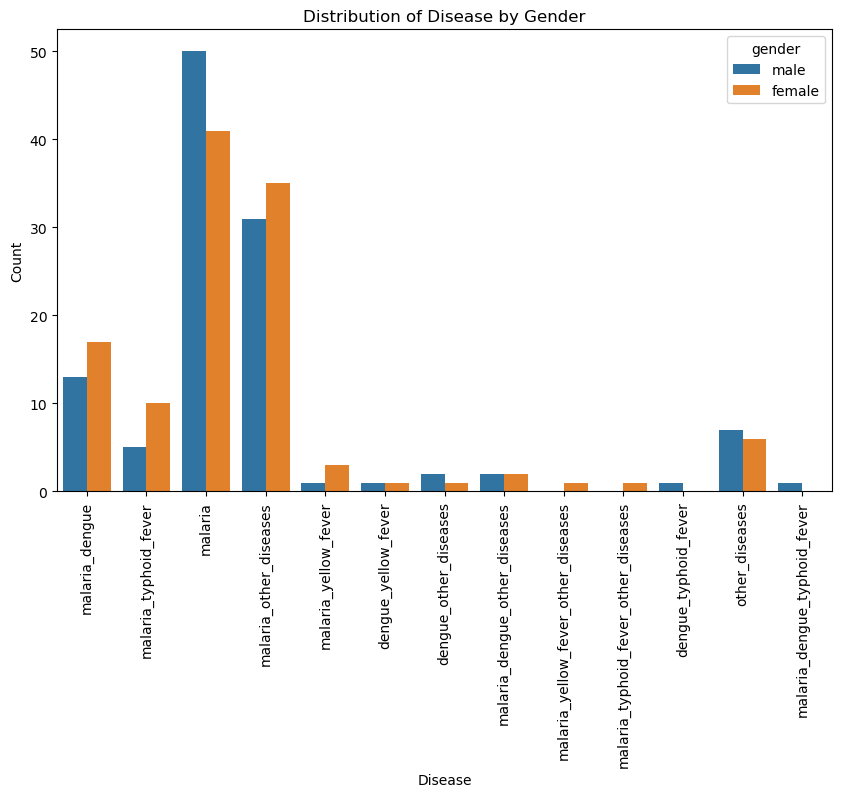

In [64]:
# Data visualization to show relationship between the Diagnosed disease and Gender of Participant

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='disease', hue='gender', data=disease_pred_df)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel('Disease')
plt.ylabel('Count')
plt.title('Distribution of Disease by Gender')

# Show the plot
plt.show()


#### **`Visualization report summary between diagnosed disease outcome and Gender of Participants`**
The countplot visualization reveals that malaria is the most common outcome in disease diagnosis. Furthermore, the data suggests that malaria incidence is higher among men compared to women. This visualization outcome further validates report by the World Health Organization (WHO), revealing malaria to be the most prevalent disease amongst other febrile illnesses.

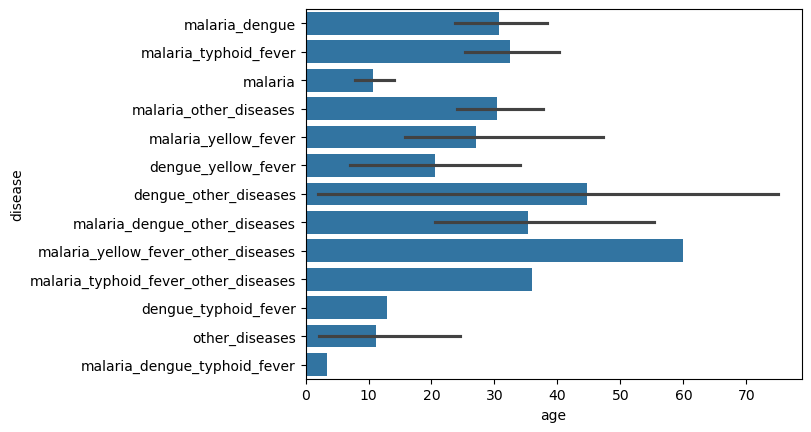

In [66]:
# Data visualization to show relationship between the Diagnosed disease and Age of Participant

# Create plot
sns.barplot(x='age', y='disease', data=disease_pred_df)

# Show plot
plt.show()


#### **`Visualization report summary between diagnosed disease outcome and Age of Participants`**
The barplot visualization reveals that malaria, yellow fever, and other diseases were the most common outcome in disease diagnosis for older patients above the age of 50 years.

## **`8. STATISTICAL ANALYSIS`**

#### **`Objective`** 
In this stage, a statistical analysis is conducted to determine whether the difference in disease outcomes between males and females is statistically significant, based on insights from the data visualization. A chi-square test of independence is conducted

In [70]:
# Import library
from scipy.stats import chi2_contingency

In [71]:
# Create a contingency table
contingency_table = pd.crosstab(disease_pred_df['disease'], disease_pred_df['gender'])

# Run the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

# Interpret the results
alpha = 0.05
if p < alpha:
    print("There is a statistically significant association between disease outcome and gender (p < 0.05).")
else:
    print("There is no statistically significant association between disease outcome and gender (p >= 0.05).")



Chi-square statistic: 8.676404218241863
p-value: 0.7302930106600872
Degrees of freedom: 12
There is no statistically significant association between disease outcome and gender (p >= 0.05).


## **`9. DATA PRE-PROCESSING, MODEL DEVELOPMENT AND PERFORMANCE EVALUATION`**

#### **`Objective`** 

In this stage, the data is further cleaned and pre-processed for model development and deployment

#### **`Data Pre-processing`**

In [75]:
 disease_pred_df_corr = disease_pred_df.copy()     # make copy of original dataset

In [76]:
# Map column with categorical variable in DataFrame 
mapping = {
    'yes': 1, 
    'no': 0, 
    'Récurrente': 1, 
    'Intermittente': 0,
    'male': 1, 
    'female': 0,
    'CMA de DO': 0, 
    'CMA de DAFRA': 1
}

for col in disease_pred_df_corr.columns:
    if disease_pred_df_corr[col].isin(mapping.keys()).any():
        disease_pred_df_corr[col] = disease_pred_df_corr[col].map(mapping).fillna(disease_pred_df_corr[col])


In [77]:
# View modified DataFrame 
disease_pred_df_corr

,health_centre,gender,age,weight,high_temperature,fever_48hrs,fever_in_the_last_7days,type_of_fever,loss_of_weight,headache,...,impaired_level_of_consciousness,facial_flushing,facial_swelling,profuse_sweating,irrational_talking,bitter_taste_in_your_throat,stiffness,respiratory_distress,shock,disease
1,0,1,26,120.0,1,1,1,Récurrente,0,1,...,0,0,0,0,0,0,0,0,0,malaria_dengue
2,0,1,25,63.0,1,1,1,Récurrente,0,1,...,0,0,0,0,0,0,0,1,0,malaria_typhoid_fever
5,0,1,6,37.5,1,1,0,Récurrente,1,1,...,0,0,0,0,0,0,0,0,0,malaria
6,0,1,2,12.0,0,0,1,Récurrente,1,0,...,0,0,0,0,0,0,0,0,0,malaria
7,0,0,2.8,71.5,1,1,1,Récurrente,0,0,...,0,0,0,0,0,0,0,0,0,malaria_other_diseases
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,1,1,70,51.0,0,1,0,Intermittente,1,0,...,0,0,0,0,0,0,0,0,0,malaria_other_diseases
288,1,1,4.5,15.0,1,1,0,Intermittente,0,1,...,0,0,0,0,0,0,1,0,0,malaria
292,1,1,6,16.0,1,1,0,Intermittente,0,1,...,0,0,0,0,0,0,1,0,0,malaria
293,1,0,2.1,10.0,1,1,0,Intermittente,0,1,...,0,0,0,0,0,0,0,0,0,malaria_dengue


In [78]:
encoded_df = disease_pred_df_corr.drop('type_of_fever', axis=1)          # drop column
encoded_df


,health_centre,gender,age,weight,high_temperature,fever_48hrs,fever_in_the_last_7days,loss_of_weight,headache,nausea,...,impaired_level_of_consciousness,facial_flushing,facial_swelling,profuse_sweating,irrational_talking,bitter_taste_in_your_throat,stiffness,respiratory_distress,shock,disease
1,0,1,26,120.0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,malaria_dengue
2,0,1,25,63.0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,malaria_typhoid_fever
5,0,1,6,37.5,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,malaria
6,0,1,2,12.0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,malaria
7,0,0,2.8,71.5,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,malaria_other_diseases
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,1,1,70,51.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,malaria_other_diseases
288,1,1,4.5,15.0,1,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,malaria
292,1,1,6,16.0,1,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,malaria
293,1,0,2.1,10.0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,malaria_dengue


In [79]:
# View 'disease' column unique values and count
encoded_df['disease'].value_counts()          

disease
malaria                                 91
malaria_other_diseases                  66
malaria_dengue                          30
malaria_typhoid_fever                   15
other_diseases                          13
malaria_yellow_fever                     4
malaria_dengue_other_diseases            4
dengue_other_diseases                    3
dengue_yellow_fever                      2
malaria_yellow_fever_other_diseases      1
malaria_typhoid_fever_other_diseases     1
dengue_typhoid_fever                     1
malaria_dengue_typhoid_fever             1
Name: count, dtype: int64

In [80]:
# Reset DataFrame index to match actual row number of DataFrame
df = encoded_df.dropna().reset_index(drop=True)
df

,health_centre,gender,age,weight,high_temperature,fever_48hrs,fever_in_the_last_7days,loss_of_weight,headache,nausea,...,impaired_level_of_consciousness,facial_flushing,facial_swelling,profuse_sweating,irrational_talking,bitter_taste_in_your_throat,stiffness,respiratory_distress,shock,disease
0,0,1,26,120.0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,malaria_dengue
1,0,1,25,63.0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,malaria_typhoid_fever
2,0,1,6,37.5,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,malaria
3,0,1,2,12.0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,malaria
4,0,0,2.8,71.5,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,malaria_other_diseases
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,1,1,70,51.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,malaria_other_diseases
228,1,1,4.5,15.0,1,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,malaria
229,1,1,6,16.0,1,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,malaria
230,1,0,2.1,10.0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,malaria_dengue


In [81]:
# Validate all column datatypes as integers
df['age'] = df['age'].astype('int64')

df['weight'] = df['weight'].astype('int64')

print(df.dtypes)

health_centre                       int64
gender                              int64
age                                 int64
weight                              int64
high_temperature                    int64
fever_48hrs                         int64
fever_in_the_last_7days             int64
loss_of_weight                      int64
headache                            int64
nausea                              int64
vomiting                            int64
joint_pain                          int64
joint_swelling                      int64
muscle_pain                         int64
chest_pain                          int64
back_pain                           int64
loss_of_consciousness               int64
loss_of_appetite                    int64
skin_rash                           int64
morbilliform_rash                   int64
bleeding                            int64
runny_nose                          int64
lethargy                            int64
dizzy                             

In [98]:
df_list = get_column_names(df)
print(df_list)

['health_centre', 'gender', 'age', 'weight', 'high_temperature', 'fever_48hrs', 'fever_in_the_last_7days', 'loss_of_weight', 'headache', 'nausea', 'vomiting', 'joint_pain', 'joint_swelling', 'muscle_pain', 'chest_pain', 'back_pain', 'loss_of_consciousness', 'loss_of_appetite', 'skin_rash', 'morbilliform_rash', 'bleeding', 'runny_nose', 'lethargy', 'dizzy', 'stomach_pain', 'swelling_stomach', 'throat_pain', 'cough', 'diarrhoea', 'retro_orbital_pain', 'shiver_cold_sensation', 'frequent_urination', 'Constipation', 'bleeding_nose', 'focal_convulsion', 'multiple_convulsions', 'impaired_level_of_consciousness', 'facial_flushing', 'facial_swelling', 'profuse_sweating', 'irrational_talking', 'bitter_taste_in_your_throat', 'stiffness', 'respiratory_distress', 'shock', 'disease']


### **`ML Model Selection (Cross validation, Hyperparameter tuning & Performance metric evaluation)`**

#### **`Objective`**

To determine model to be selected and adopted for predictive analytics, principally considering the sensitivity, specificity and nuances of diagnostic prediction in healthcare

In [82]:
# Import necessary libraries for ML Model testing, training and Evaluation

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, f1_score, classification_report, confusion_matrix, auc, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn import svm
from scipy import stats
import numpy as np
import warnings
import shap


In [166]:
df_selection = df       # Create copy of original DataFrame


In [170]:
!pip install shap      # Installing library for hyperparameter tuning


   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   -- ------------------------------------ 41.0/545.3 kB 991.0 kB/s eta 0:00:01
   -- ------------------------------------ 41.0/545.3 kB 991.0 kB/s eta 0:00:01
   -- ------------------------------------ 41.0/545.3 kB 991.0 kB/s eta 0:00:01
   ------- ------------------------------ 112.6/545.3 kB 547.6 kB/s eta 0:00:01
   ------- ------------------------------ 112.6/545.3 kB 547.6 kB/s eta 0:00:01
   ------- ------------------------------ 112.6/545.3 kB 547.6 kB/s eta 0:00:01
   ---------- --------------------------- 153.6/545.3 kB 437.1 kB/s eta 0:00:01
   ------------- ------------------------ 194.6/545.3 kB 491.5 kB/s eta 0:00:01
   -------------- ----------------------- 204.8/545.3 kB 429.5 kB/s eta 0:00:01
   ----------------- -------------------- 256.0/545.3 kB 491.5 kB/s eta 0:00:01
   ------------------- ------------------ 286.7/545.3 kB 520.7 kB/s eta 0:00:01
   ---------------------- --------------- 317.4/5

In [172]:
# Suppress the UserWarning from roc_auc_score for macro averaging
warnings.filterwarnings('ignore', category=UserWarning)

# Separate features (X_selection) and target (y_selection)
X_selection = df_selection.drop('disease', axis=1)
y_selection = df_selection['disease']

# Define the models to be evaluated
models = {
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVC": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier()
}

# Build a robust and reproducible pipeline

# Create a full pipeline for each model
full_pipelines = {
    name: Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),   # No missing values are present in data however
        ('scaler', StandardScaler()),                    # Scale features
        ('classifier', model)
    ]) for name, model in models.items()
}

# Perform stratified cross-validation and evaluate

# Use stratified cross-validation for fair evaluation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to store results
results = {name: {'accuracy': [], 'recall': [], 'f1_score': [], 'auc_score': []} for name in models.keys()}

print("--- Starting Stratified Cross-Validation ---")

# Perform cross-validation
for name, pipeline in full_pipelines.items():
    print(f"\nEvaluating Model: {name}")
    
    # Store predictions to calculate full classification report later
    y_true_all, y_pred_all, y_pred_proba_all = [], [], []
    
    for train_index, test_index in skf.split(X_selection, y_selection):
        X_train_selection, X_test_selection = X_selection.iloc[train_index], X_selection.iloc[test_index]
        y_train_selection, y_test_selection = y_selection.iloc[train_index], y_selection.iloc[test_index]
        
        # Fit and predict
        pipeline.fit(X_train_selection, y_train_selection)
        y_pred_selection = pipeline.predict(X_test_selection)
        
        # SVC doesn't need scaling in predict_proba, but the pipeline handles it
        y_pred_proba_selection = pipeline.predict_proba(X_test_selection)

        # Append predictions for overall report
        y_true_all.extend(y_test_selection)
        y_pred_all.extend(y_pred_selection)
        y_pred_proba_all.extend(y_pred_proba_selection)

        # Get all class labels from the trained model
        all_classes = pipeline.named_steps['classifier'].classes_
        
        # Calculate and store metrics for the fold
        results[name]['accuracy'].append(accuracy_score(y_test_selection, y_pred_selection))
        results[name]['recall'].append(recall_score(y_test_selection, y_pred_selection, average='macro', zero_division=0))
        results[name]['f1_score'].append(f1_score(y_test_selection, y_pred_selection, average='macro', zero_division=0))
        
        # Handle AUC score for potentially missing classes in a fold
        try:
            auc_score = roc_auc_score(y_test_selection, y_pred_proba_selection, multi_class='ovr', average='macro', labels=all_classes)
            results[name]['auc_score'].append(auc_score)
        except ValueError:
            results[name]['auc_score'].append(np.nan)

    # Print average metrics and full classification report after all folds
    print(f"Average Accuracy: {np.mean(results[name]['accuracy']):.4f}")
    print(f"Average Recall: {np.mean(results[name]['recall']):.4f}")
    print(f"Average F1-Score: {np.mean(results[name]['f1_score']):.4f}")
    print(f"Average AUC Score: {np.nanmean(results[name]['auc_score']):.4f}")
    print("Full Classification Report (based on all predictions):\n", classification_report(y_true_all, y_pred_all, zero_division=0))
    print("-" * 50)


--- Starting Stratified Cross-Validation ---

Evaluating Model: Logistic Regression
Average Accuracy: 0.4357
Average Recall: 0.1999
Average F1-Score: 0.1968
Average AUC Score: nan


C:\Users\DAMILOLA\AppData\Local\Temp\ipykernel_20876\1050048434.py:99: RuntimeWarning: Mean of empty slice
  print(f"Average AUC Score: {np.nanmean(results[name]['auc_score']):.4f}")
C:\Users\DAMILOLA\AppData\Local\Temp\ipykernel_20876\1050048434.py:99: RuntimeWarning: Mean of empty slice
  print(f"Average AUC Score: {np.nanmean(results[name]['auc_score']):.4f}")


Full Classification Report (based on all predictions):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.56      0.62      0.59        91
           4       0.26      0.23      0.25        30
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         1
           7       0.43      0.45      0.44        66
           8       0.24      0.27      0.25        15
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         1
          12       0.40      0.31      0.35        13

    accuracy                           0.44       232
   macro avg       0.15      0.14      0.14       232
weighted avg       0.41      0.44      0.42       232

-----------------------

C:\Users\DAMILOLA\AppData\Local\Temp\ipykernel_20876\1050048434.py:99: RuntimeWarning: Mean of empty slice
  print(f"Average AUC Score: {np.nanmean(results[name]['auc_score']):.4f}")


Average Accuracy: 0.4486
Average Recall: 0.1744
Average F1-Score: 0.1574
Average AUC Score: nan
Full Classification Report (based on all predictions):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.53      0.68      0.60        91
           4       0.25      0.23      0.24        30
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         1
           7       0.44      0.53      0.48        66
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00        13

    accuracy                           0.45       232
   macro avg       0.09      0.11   

C:\Users\DAMILOLA\AppData\Local\Temp\ipykernel_20876\1050048434.py:99: RuntimeWarning: Mean of empty slice
  print(f"Average AUC Score: {np.nanmean(results[name]['auc_score']):.4f}")
C:\Users\DAMILOLA\AppData\Local\Temp\ipykernel_20876\1050048434.py:99: RuntimeWarning: Mean of empty slice
  print(f"Average AUC Score: {np.nanmean(results[name]['auc_score']):.4f}")



--- Starting Hyperparameter Tuning for Random Forest ---
Best Parameters for Random Forest: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Best F1-macro Score for Random Forest: 0.2110500678747263


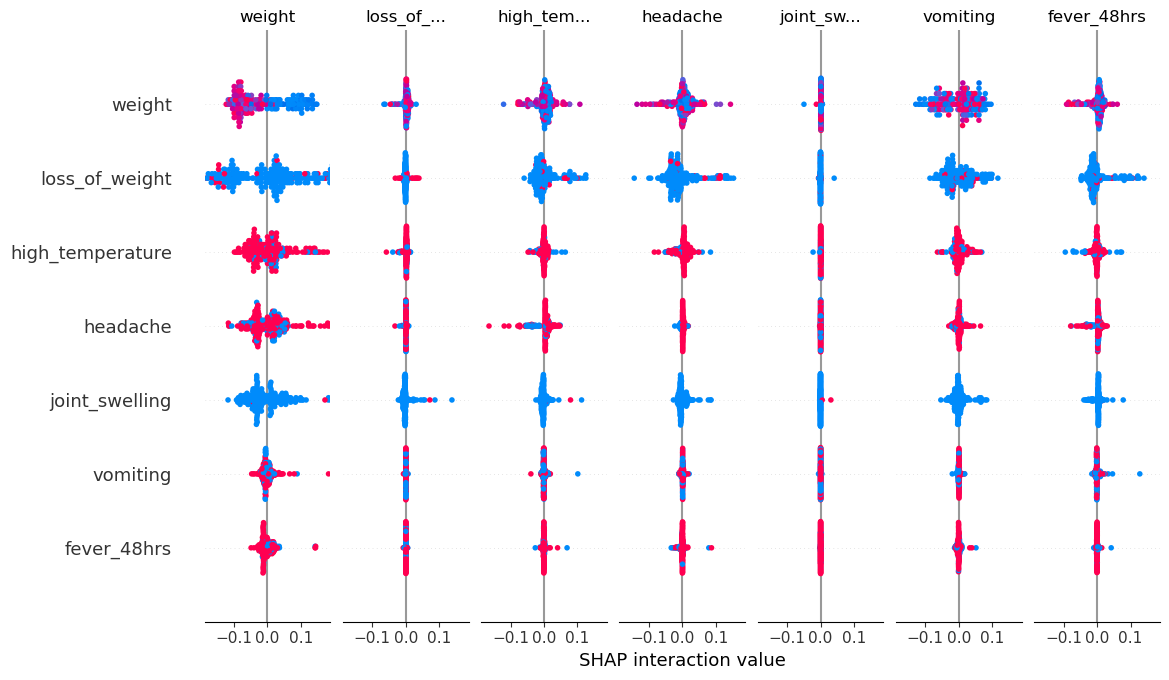

In [182]:
# Hyperparameter tuning

# Define hyperparameter grid for tuning Random forest model (best performing model)
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
}

# Tuning the Random Forest model
print("\n--- Starting Hyperparameter Tuning for Random Forest ---")
grid_search_rf = GridSearchCV(
    full_pipelines['Random Forest'], 
    param_grid_rf, 
    scoring='f1_macro', # Use a balanced metric like F1-macro for tuning
    cv=skf,
    n_jobs=-1
)
grid_search_rf.fit(X_selection, y_selection)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best F1-macro Score for Random Forest:", grid_search_rf.best_score_)


# Interprete the best model with Explainable AI (XAI)

# Using the best Random Forest model found via tuning
best_rf_model = grid_search_rf.best_estimator_

# Create a SHAP explainer
explainer = shap.TreeExplainer(best_rf_model.named_steps['classifier'])
X_preprocessed = best_rf_model.named_steps['imputer'].fit_transform(X_selection)
X_preprocessed = best_rf_model.named_steps['scaler'].fit_transform(X_preprocessed)

shap_values = explainer.shap_values(X_preprocessed)

# Plot summary for feature importance across all classes
shap.summary_plot(shap_values, X_preprocessed, feature_names=X_selection.columns)


#### **`ML Model Training and Performance Evaluation`**

Independent Features (X): (232, 45)
Target Variable (y): (232,)
Shape of the X_train (139, 45)
Shape of the X_test (93, 45)
Shape of the y_train (139,)
Shape of the y_test (93,)
Model: SVM
Accuracy: 0.46236559139784944
AUC Score: 0.6862640865992975
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.53      0.67      0.59        39
           4       0.27      0.33      0.30         9
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.41      0.52      0.46        25
           8       1.00      0.12      0.22         8
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         4

    accuracy                           0.46        93
   macro avg       0.20

C:\Users\DAMILOLA\anaconda3\New Folder navigator\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DAMILOLA\anaconda3\New Folder navigator\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DAMILOLA\anaconda3\New Folder navigator\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

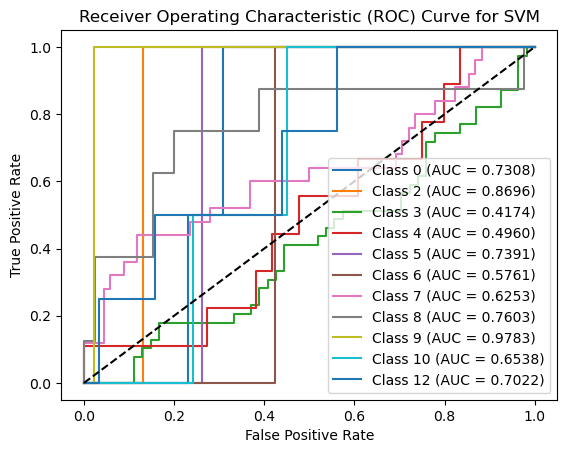

C:\Users\DAMILOLA\anaconda3\New Folder navigator\Lib\site-packages\sklearn\multiclass.py:551: RuntimeWarning: invalid value encountered in divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


ValueError: Input contains NaN.

In [83]:
# Convert target variable to class labels using Label Encoder             
le = LabelEncoder()
df['disease'] = le.fit_transform(df['disease'])

# Define features (X) and target (y)
X = df.drop('disease', axis=1)                       # independent features
y = df['disease']                                    # target variable (dependent feature)

# View shape of DataFrame independent features (X) and target variable (y)
print("Independent Features (X):", X.shape)
print("Target Variable (y):", y.shape)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

# View shape of train and test set
print("Shape of the X_train", X_train.shape)
print("Shape of the X_test", X_test.shape)
print("Shape of the y_train", y_train.shape)
print("Shape of the y_test", y_test.shape)


# FEATURE SCALING:
# Transformation of independent feature (X) numerical values to standardize features
ss = StandardScaler()
 
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)


# Define models with One-vs-Rest approach (approach adopted for this multiclass project)
models = {
    'SVM': OneVsRestClassifier(svm.SVC(probability=True)),
    'Decision Tree': OneVsRestClassifier(DecisionTreeClassifier()),
    'Random Forest': OneVsRestClassifier(RandomForestClassifier(n_estimators=100)),
    'KNN': OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
}

# Train and create loop to evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)       

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("AUC Score:", auc_score)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")

    # Binarize the true labels
    lb = LabelBinarizer()
    y_test_binarized = lb.fit_transform(y_test)
    
    # Check the shapes to be sure they match
    print("Shape of binarized y_test:", y_test_binarized.shape)
    print("Shape of y_pred_proba:", y_pred_proba.shape)

    # DATA VISUALIZATION
    # Plot the ROC curve for each class
    for i in range(len(lb.classes_)):
        # Note the change: use y_test_binarized[:, i] instead of y_test == i
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
        plt.plot(fpr, tpr, label=f"Class {lb.classes_[i]} (AUC = {auc(fpr, tpr):.4f})")
    
    # Assign plot parameter for each class of ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"Receiver Operating Characteristic (ROC) Curve for {name}")
    plt.legend(loc='best')
    plt.show()


In [84]:
# Select the best model based on AUC score
best_model_name = max(models, key=lambda x: roc_auc_score(y_test, models[x].predict_proba(X_test), multi_class='ovr'))
best_model = models[best_model_name]

print(f"Best Model: {best_model_name}")

# Define function to calculate confidence interval for prediction
def calculate_confidence_interval(proba, confidence=0.95):
    standard_error = np.sqrt((proba * (1 - proba)) / len(X_test))
    z_score = stats.norm.ppf(1 - (1 - confidence) / 2)
    margin_of_error = z_score * standard_error
    lower_bound = proba - margin_of_error
    upper_bound = proba + margin_of_error
    return lower_bound, upper_bound

# Assign best model to develop confidence interval
y_pred_proba_best_model = best_model.predict_proba(X_test)
confidence_intervals = []
for i in range(len(y_pred_proba_best_model)):
    proba = np.max(y_pred_proba_best_model[i])
    lower_bound, upper_bound = calculate_confidence_interval(proba)
    confidence_intervals.append((lower_bound, upper_bound))

# Use the confidence intervals to assist doctors
for i in range(len(y_test)):
    disease = le.inverse_transform([np.argmax(y_pred_proba_best_model[i])])[0]
    confidence = f"({confidence_intervals[i][0]:.2f}, {confidence_intervals[i]:.2f})"
    print(f"Predicted disease: {disease} with confidence {confidence}")


C:\Users\DAMILOLA\anaconda3\New Folder navigator\Lib\site-packages\sklearn\multiclass.py:551: RuntimeWarning: invalid value encountered in divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


ValueError: Input contains NaN.

In [86]:
# Troubleshoot Value error: Input contains NaN
# having verified missing values using isnull()
# 'try and except statement' adopted for exception handling

# Create copies of train and test data
X_test_cleaned = X_test.copy()
y_test_cleaned = y_test.copy()

# Create a robust loop to test each model
scores = {}
for name, model in models.items():
    try:
        y_pred_proba = model.predict_proba(X_test_cleaned)
        # Check for NaNs and infs in the probabilities before scoring
        if np.isnan(y_pred_proba).any() or np.isinf(y_pred_proba).any():
            print(f"Warning: Model '{name}' produced NaN or inf in predict_proba. Skipping.")
            continue 

        score = roc_auc_score(y_test_cleaned, y_pred_proba, multi_class='ovr')
        scores[name] = score
    except Exception as e:
        print(f"Error evaluating model '{name}': {e}")
        continue

# Find the best model from the reliable scores
if scores:
    best_model_name = max(scores, key=scores.get)
    best_model = models[best_model_name]
    print(f"Best Model: {best_model_name} with score {scores[best_model_name]}")
else:
    print("No models could be successfully evaluated.")


Error evaluating model 'Random Forest': This OneVsRestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.
Error evaluating model 'KNN': This OneVsRestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.
Best Model: SVM with score 0.6862640865992975


C:\Users\DAMILOLA\anaconda3\New Folder navigator\Lib\site-packages\sklearn\multiclass.py:551: RuntimeWarning: invalid value encountered in divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


In [87]:
# Adopt exception handling error feedback to address Value error: Input contains NaN

# Remove any NaNs or Infs from the target variable y_test
nan_inf_mask_y = np.isnan(y_test_cleaned) | np.isinf(y_test_cleaned)
if np.any(nan_inf_mask_y):
    print("Warning: Invalid values found in y_test. Dropping corresponding samples.")
    X_test_cleaned = X_test_cleaned[~nan_inf_mask_y]
    y_test_cleaned = y_test_cleaned[~nan_inf_mask_y]

# Check and clean X_test_cleaned
nan_inf_mask_x = np.isnan(X_test_cleaned).any(axis=1) | np.isinf(X_test_cleaned).any(axis=1)
if np.any(nan_inf_mask_x):
    print("Warning: Invalid values found in X_test_cleaned. Dropping corresponding samples.")
    X_test_cleaned = X_test_cleaned[~nan_inf_mask_x]
    y_test_cleaned = y_test_cleaned[~nan_inf_mask_x]


# Define and correctly initialize all models
# Random Forest and KNN wrapped in OneVsRestClassifier
# since predict_proba is being used with multiclass='ovr'
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': OneVsRestClassifier(RandomForestClassifier(random_state=42)),
    'KNN': OneVsRestClassifier(KNeighborsClassifier()),
    'SVM': SVC(probability=True, random_state=42)
}

# Iterate through models to find the best, with robust checks
scores = {}
for name, model in models.items():
    try:
        # Fit the model before evaluation
        model.fit(X_train, y_train)

        y_pred_proba = model.predict_proba(X_test_cleaned)

        # Check for NaNs and infs in the probabilities before scoring
        if np.isnan(y_pred_proba).any() or np.isinf(y_pred_proba).any():
            print(f"Warning: Model '{name}' produced NaN or inf in predict_proba. Skipping.")
            continue
        
        # Calculate the AUC score
        score = roc_auc_score(y_test_cleaned, y_pred_proba, multi_class='ovr')
        scores[name] = score
        print(f"Model: {name}, ROC AUC Score: {score:.4f}")
    except Exception as e:
        print(f"Error evaluating model '{name}': {e}. Skipping.")
        continue

if scores:
    best_model_name = max(scores, key=scores.get)
    best_model = models[best_model_name]
    print(f"\nBest Model: {best_model_name} with score {scores[best_model_name]:.4f}")

    # Use the best model to make predictions and get probabilities
    y_pred_proba_best_model = best_model.predict_proba(X_test_cleaned)
    row_sums = y_pred_proba_best_model.sum(axis=1, keepdims=True)
    y_pred_proba_best_model_safe = np.where(row_sums == 0, 0, y_pred_proba_best_model / row_sums)
    y_pred_proba_best_model_safe = np.nan_to_num(y_pred_proba_best_model_safe)

    # Define function to calculate confidence interval
    def calculate_confidence_interval(proba, confidence=0.95):
        standard_error = np.sqrt((proba * (1 - proba)) / len(X_test_cleaned))
        z_score = stats.norm.ppf(1 - (1 - confidence) / 2)
        margin_of_error = z_score * standard_error
        lower_bound = max(0, proba - margin_of_error)
        upper_bound = min(1, proba + margin_of_error)
        return lower_bound, upper_bound

    confidence_intervals = []
    for i in range(len(y_pred_proba_best_model_safe)):
        proba = np.max(y_pred_proba_best_model_safe[i])
        lower_bound, upper_bound = calculate_confidence_interval(proba)
        confidence_intervals.append((lower_bound, upper_bound))

    # Initialize LabelEncoder to fit train data
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    le.fit(y_train)

    for i in range(len(y_test_cleaned)):
        predicted_class_index = np.argmax(y_pred_proba_best_model_safe[i])
        disease = le.inverse_transform([predicted_class_index])[0]

        # Check bounds before formatting
        if len(confidence_intervals[i]) == 2:
            confidence = f"({confidence_intervals[i][0]:.2f}, {confidence_intervals[i][1]:.2f})"
        else:
            confidence = "Confidence not available"

        print(f"Predicted disease: {disease} with confidence {confidence}")

else:
    print("Unable to determine the best model. No scores were successfully calculated.")


Model: Decision Tree, ROC AUC Score: 0.5504
Model: Random Forest, ROC AUC Score: 0.6317
Model: KNN, ROC AUC Score: 0.6056
Model: SVM, ROC AUC Score: 0.5519

Best Model: Random Forest with score 0.6317
Predicted disease: 3 with confidence (0.50, 0.70)
Predicted disease: 3 with confidence (0.30, 0.50)
Predicted disease: 3 with confidence (0.56, 0.75)
Predicted disease: 7 with confidence (0.57, 0.76)
Predicted disease: 4 with confidence (0.34, 0.55)
Predicted disease: 4 with confidence (0.35, 0.55)
Predicted disease: 12 with confidence (0.29, 0.49)
Predicted disease: 4 with confidence (0.58, 0.77)
Predicted disease: 3 with confidence (0.44, 0.64)
Predicted disease: 4 with confidence (0.34, 0.54)
Predicted disease: 3 with confidence (0.64, 0.82)
Predicted disease: 7 with confidence (0.25, 0.44)
Predicted disease: 3 with confidence (0.43, 0.63)
Predicted disease: 3 with confidence (0.58, 0.77)
Predicted disease: 3 with confidence (0.61, 0.80)
Predicted disease: 7 with confidence (0.50, 0.70

In [94]:
# Import library for data saving and downstream processing
import joblib

# Save the best model
joblib.dump(best_model, 'best_model.pkl')

# Save the LabelEncoder
joblib.dump(le, 'label_encoder.pkl')

# Save the X_train data
joblib.dump(X_train, 'X_train.pkl')

# Save the y_train data
joblib.dump(y_train, 'y_train.pkl')

print("Model, LabelEncoder, X_train and y_train saved successfully.")


Model and LabelEncoder saved successfully.


In [90]:
# Store DataFrame as a CSV file
try:
    # Convert the DataFrame to a CSV file
    df.to_csv('df.csv', index=False)
    print("CSV file created successfully: df.csv")
except Exception as e:
    print("Error creating CSV file:", str(e))


CSV file created successfully: df.csv


In [ ]:
#  10. Deployment on Streamlit (CODE WAS RUN FROM STREAMLIT DIRECTORY IN GITHUB)

#  --- Import python libraries ---
# import streamlit as st
# import pandas as pd
# import joblib
# import numpy as np
# from scipy import stats
# from PIL import Image

#  --- Load the saved objects ---
# try:
#     best_model = joblib.load('best_model.pkl')
#     le = joblib.load('label_encoder.pkl')
# except FileNotFoundError:
#     st.error("Model or LabelEncoder file not found.")
#     st.stop()

#  --- Rename independent features (patient bio & symptoms) for user friendliness using Mapping---
# user_friendly_feature_names = {
#     'health_centre': 'Health Centre',
#     'age': 'Age (years)',
#     'weight': 'Weight (kg)',
#     'gender_encoded': 'Gender',
#     'high_temperature': 'High body temperature',
#     'fever_48hrs': 'Had fever for more than 48 hours',
#     'fever_in_the_last_7days': 'Had fever in the last 7 days',
#     'loss_of_weight': 'Loss of weight',
#     'headache': 'Headache',
#     'nausea': 'Nausea',
#     'vomiting': 'Vomiting',
#     'joint_pain': 'Joint pain',
#     'joint_swelling': 'Joint swelling',
#     'muscle_pain': 'Muscle pain',
#     'chest_pain': 'Chest pain',
#     'back_pain': 'Back pain',
#     'loss_of_consciousness': 'Loss of consciousness',
#     'loss_of_appetite': 'Loss of appetite',
#     'skin_rash': 'Skin rash',
#     'morbilliform_rash': 'Morbilliform rash',
#     'bleeding': 'Bleeding',
#     'runny_nose': 'Runny nose',
#     'lethargy': 'Lethargy',
#     'dizzy': 'Dizzy',
#     'stomach_pain': 'Stomach pain',
#     'swelling_stomach': 'Swelling stomach',
#     'throat_pain': 'Throat pain',
#     'cough': 'Cough',
#     'diarrhoea': 'Diarrhoea',
#     'retro_orbital_pain': 'Retro-orbital pain',
#     'shiver_cold_sensation': 'Cold shivering sensation',
#     'frequent_urination': 'Frequent urination',
#     'Constipation': 'Constipation',
#     'bleeding_nose': 'Bleeding nose',
#     'focal_convulsion': 'Focal convulsion',
#     'multiple_convulsions': 'Multiple convulsion',
#     'impaired_level_of_consciousness': 'Impaired level of consciousness',
#     'facial_flushing': 'Facial flushing',
#     'facial_swelling': 'Facial swelling',
#     'profuse_sweating': 'Profuse sweating',
#     'irrational_talking': 'Irrational talking',
#     'bitter_taste_in_your_throat': 'Bitter taste in your throat',
#     'stiffness': 'Stiffness',
#     'respiratory_distress': 'Respiratory distress',
#     'shock': 'Shock'
# }

#  --- Rename label encoded target variable to actual disease names for Doctors understanding using Mapping ---
# user_friendly_disease_names = {
#     '4': ['Malaria', 'Dengue'],
#     '8': ['Malaria', 'Thyphoid Fever'],
#     '3': ['Malaria'],
#     '7': ['Malaria', 'Other diseases'],
#     '10': ['Malaria', 'Yellow fever'],
#     '2': ['Dengue', 'Yellow fever'],
#     '0': ['Dengue', 'Other diseases'],
#     '5': ['Malaria', 'Dengue', 'Other diseases'],
#     '11': ['Malaria', 'Yellow fever', 'Other diseases'],
#     '9': ['Malaria', 'Thyphoid fever', 'Other diseases'],
#     '1': ['Dengue', 'Thyphoid fever'],
#     '12': ['Other diseases'],
#     '6': ['Malaria', 'Dengue', 'Typhoid Fever']
# }

#  --- Rename transformed independent features for better interpretation for Doctors using Mappings ---
# gender_options = {'Female': 0, 'Male': 1}
# health_centre_options = {'CMA de DO': 0, 'CMA de DAFRA': 1}
# boolean_options = {'False': 0, 'True': 1}        # Define boolean value interpretation of features 

#  --- Defining Bootstrap function to calculate Confidence Interval---
# def calculate_bootstrap_confidence_interval(model, input_data_dict, n_bootstraps=1000, confidence=0.95):
#     input_df = pd.DataFrame([input_data_dict])
#     predicted_probabilities = []
    
#     if len(input_df.columns) == 0:
#         return 0, 0

#     for _ in range(n_bootstraps):
#         resampled_input = input_df.sample(n=len(input_df), replace=True)
#         proba = model.predict_proba(resampled_input)
        
#         row_sums = proba.sum(axis=1, keepdims=True)
#         safe_proba = np.where(row_sums == 0, 0, proba / row_sums)
#         predicted_probabilities.append(np.max(safe_proba, axis=1))

#     lower_bound = np.percentile(predicted_probabilities, (1 - confidence) / 2 * 100)          # define lower limit for Confidence Interval
#     upper_bound = np.percentile(predicted_probabilities, (1 - (1 - confidence) / 2) * 100)    # define upper limit for Confidence Interval
    
#     return lower_bound, upper_bound                                                           # return both lower and upper values for Confidence Interval

#  --- Streamlit App Layout ---
# image_banner = Image.open('Images/docpal_banner1.png')                                       # image for top banner
# st.image(image_banner, use_container_width=True)

# st.set_page_config(layout="wide")                                                            # st.set_page_config sets up App page configuration
# st.markdown("<h1 style='text-align: center;'>🤖 DocPal App</h1>", unsafe_allow_html=True)   # Streamlit St.markdown function, used to call and centralize App name
# st.write('_Enter patient\'s symptoms to get a disease prediction_')                          # Stramlit st.write function, used for documenting information about App
# st.info('***DocPal! Your disease diagnostic assistant*** :sparkles:')                        # Streamlit st.info function, used for documenting information about App

#  --- Insert images in App layout ---
# image_sidebar = Image.open('Images/docpal_side_banner.png')                                  # image for sidebar
# st.sidebar.image(image_sidebar, use_container_width=True)

#  App use instruction
# with st.expander(' :rotating_light:  Instruction on how to use the DocPal app  '):
#     st.write(':one: Click on the sidebar icon at the top left corner of your screen')
#     st.write(':two: Insert basic patient information')
#     st.write(':three: Click Update Patient info')
#     st.write(':four: Move to center screen to select specific symptoms based on patient feedback')
#     st.write(':five: Click on Get Prediction')
#     st.write(':six: Thank you for using this app :grin: ')


#  --- Create the sidebar for basic patient info ---
# st.sidebar.header('Basic Patient Information')
# with st.sidebar.form(key='sidebar_form'):
#     user_inputs_sidebar = {}
#     selected_hc_name = st.selectbox('Health Centre', options=list(health_centre_options.keys()))
#     user_inputs_sidebar['health_centre'] = health_centre_options[selected_hc_name]
#     user_inputs_sidebar['age'] = st.slider('Age (years)', min_value=0, max_value=120, value=50)
#     user_inputs_sidebar['weight'] = st.slider('Weight (kg)', min_value=10.0, max_value=200.0, value=70.0, step=0.5)
#     selected_gender_name = st.selectbox('Gender', options=list(gender_options.keys()))
#     user_inputs_sidebar['gender_encoded'] = gender_options[selected_gender_name]
#     submit_button_sidebar = st.form_submit_button(label='Update Patient Info')

#  --- User input form for symptoms in the main area ---
# st.header('Patient Symptoms')
# with st.form(key='prediction_form'):
#     user_inputs_main = user_inputs_sidebar.copy()
    
#     boolean_features = [                                                                      # Create a list out of all the independent features
#         'high_temperature', 'fever_48hrs', 'fever_in_the_last_7days',
#         'loss_of_weight', 'headache', 'nausea', 'vomiting', 'joint_pain',
#         'joint_swelling', 'muscle_pain', 'chest_pain', 'back_pain',
#         'loss_of_consciousness', 'loss_of_appetite', 'skin_rash',
#         'morbilliform_rash', 'bleeding', 'runny_nose', 'lethargy',
#         'dizzy', 'stomach_pain', 'swelling_stomach', 'throat_pain',
#         'cough', 'diarrhoea', 'retro_orbital_pain', 'shiver_cold_sensation',
#         'frequent_urination', 'Constipation', 'bleeding_nose',
#         'focal_convulsion', 'multiple_convulsions',
#         'impaired_level_of_consciousness', 'facial_flushing',
#         'facial_swelling', 'profuse_sweating', 'irrational_talking',
#         'bitter_taste_in_your_throat', 'stiffness',
#         'respiratory_distress', 'shock'
#     ]
    
#     for feature in boolean_features:                                                            # Create loop to iterate over features within boolean features list above
#         display_name = user_friendly_feature_names[feature]
#         selected_bool = st.selectbox(display_name, options=list(boolean_options.keys()))        # Streamlit st.selectbox function is assigned to each feature
#         user_inputs_main[feature] = boolean_options[selected_bool]                              # Assign boolean values to th features using the st.selectbox input mechanism
    
#     submit_button_main = st.form_submit_button(label='Get Prediction')                          # Streamlit button function to get prediction
    
#  --- Prediction and Output ---
# if submit_button_main:
#     try:
#         # Create a DataFrame from the dictionary, ensuring it's 2D
#         input_data = pd.DataFrame([user_inputs_main])
#         input_data = input_data.apply(pd.to_numeric, errors='coerce')
        
#         if input_data.isnull().values.any():
#             st.warning("Invalid input detected. Please ensure all values are valid.")
#         else:
#             st.subheader('Prediction Result')

#             # Pass the dictionary directly to the bootstrap function
#             lower, upper = calculate_bootstrap_confidence_interval(best_model, user_inputs_main)
            
#             # Perform single prediction
#             probabilities = best_model.predict_proba(input_data)
#             row_sums = probabilities.sum(axis=1, keepdims=True)
#             safe_probabilities = np.where(row_sums == 0, 0, probabilities / row_sums)
#             safe_probabilities = np.nan_to_num(safe_probabilities)

#             predicted_class_index = np.argmax(safe_probabilities, axis=1)
#             original_predicted_disease_label = str(predicted_class_index[0])
            
#             # Mapping of predicted disease
#             display_predicted_diseases = user_friendly_disease_names.get(
#                 str(le.classes_[predicted_class_index[0]]), 
#                 [f'Disease with label {le.classes_[predicted_class_index[0]]}']
#             )
            
#             st.success(f'Predicted Disease: **{", ".join(display_predicted_diseases)}**')
#             st.info(f'**Confidence Interval:** ({lower:.2f}, {upper:.2f})')
            
#             st.write('**Predicted Probabilities:**')
            
#             # Map classes from LabelEncoder to dictionary keys
#             class_labels = [", ".join(user_friendly_disease_names.get(str(c), [str(c)])) for c in le.classes_]
            
#             prob_df = pd.DataFrame(safe_probabilities, columns=class_labels).T
#             prob_df.columns = ['Probability']
#             st.bar_chart(prob_df)

#     except Exception as e:
#         st.error(f"An error occurred: {e}")


### **`11. REFERENCE`**

Akinwande, G., & Alenbesunu, F. (2024). Documentation of Medical Errors in Nigeria: A Review. Research Square. https://doi.org/10.21203/rs.3.rs-4002952/v1

Baba, M., Logue, C. H., Oderinde, B., Abdulmaleek, H., Williams, J., Lewis, J., Laws, T. R., Hewson, R., Marcello, A., & D'Agaro, P. (2013). Evidence of arbovirus co-infection in suspected febrile malaria and typhoid patients in Nigeria. The Journal of Infection in Developing Countries, 7(1), 51–59. https://doi.org/10.3855/jidc.2411

Moses, A. E., Atting, I. A., & Inyang, O. S. (2016). Evidence of Overlapping Infections of Dengue, Malaria and Typhoid in Febrile Patients Attending a Tertiary Health Facility in Uyo, South-South Nigeria. Journal of Advances in Medicine and Medical Research, 17(3), 1–9. https://doi.org/10.9734/BJMMR/2016/27668

Okoror, L., Bankefa, E. O., Ukhureigbe, O. M., Ajayi, E. O., Osanyilusi, S., & Ogeneh, B. (2024). Misdiagnosis of Dengue Fever as Malaria and Typhoid Fever and Their Co-infection in Rural Areas of Southwest Nigeria. Qeios. https://doi.org/10.32388/CJ7D8I

Ouedraogo, Issouf. (2024). Tabular dataset for AI-based vector-borne disease prediction. Mendeley Data, V1, doi: 10.17632/cf49v47z4c.1
